# Airbnb Price Predictor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error


Q) Describe the dataset you chose. Why did you choose it? What features does it include? What year is it from? How was it collected? What should we know about this dataset as we read your writeup? (4pts)

Answer: 
The New York Airbnb Open Data is a dataset available on Kaggle that provides information on Airbnb listings in New York City. This dataset is really useful to work around the key aspects of machine learning along with various features and a dataset of 1,00,000 values it makes it more interesting to work on this data.

The dataset includes information on approximately 100000 Airbnb listings in New York City.
Year 2019.
The data was collected from and includes information on the location of the listing, the price per night, the number of bedrooms and bathrooms, the property type, the availability of amenities, and more.

Features:

id: Unique identifier for each listing.
name: Name of the listing.
host_id: Unique identifier for the host of the listing.
host_name: Name of the host.
neighbourhood_group: The borough in which the listing is located.
neighbourhood: The specific neighbourhood in which the listing is located.
latitude: Latitude of the listing.
longitude: Longitude of the listing.
room_type: The type of room being listed (e.g. private room, entire home/apartment).
price: Price per night in USD.
minimum_nights: The minimum number of nights required to book the listing.
number_of_reviews: The number of reviews the listing has received.
last_review: Date of the last review.
reviews_per_month: The average number of reviews per month.
calculated_host_listings_count: The number of listings for the host.
availability_365: The number of days the listing is available for booking within the next 365 days.

As you read my writeup, it is important to keep in mind that this dataset is not comprehensive and may not reflect the entire Airbnb market in New York City.


Q) Define a research question. What are you trying to predict? Describe what you're trying to accomplish (it will differ between Supervised and Unsupervised learning). (4pts)

Ans:
Can the price of Airbnb rentals in NYC be estimated using information like location, home type, amenities, and guest reviews?

The purpose of this machine learning project is to create a model that can reliably estimate the cost of Airbnb rentals in New York City. This information is useful for both hosts looking to set a competitive pricing for their listings and potential guests want to learn more about their alternatives.


Q) Why is this algorithm a good way of answering your research question? (2pts)

I chose two algorithms:
An ensemble approach, Random Forest mixes several decision trees to work with numerical and categorical information. Because of this, it works well with datasets like the Airbnb dataset, which combines the two. It is beneficial for datasets with numerous features, because Random Forest is resistant to overfitting and can accommodate a high number of features.

A useful approach for estimating the costs of Airbnb rentals is Linear Regression because of its ease of use and accuracy with numerical predictions. It uses the reasonable assumption that the dependent variable (price) is directly proportional to the independent variables (features). Because of its straightforwardness, linear regression may be used to shed light on the variables that influence Airbnb's pricing structure.


Q) Using the data you chose and the algorithm you chose, read in your data and run your model. (6pts)

Completed.

Q) Tinker with parameters at least 3 times (changing learning rate, changing features, changing k like in KNN, etc). You may tinker with the same kind of parameter 3 times, it doesn't have to be 3 different parameters. (example: you can just tinker with k. k=1, k=3, or k=8) Or you might want to tinker with features and also your k value or whatever is appropriate for your algorithm. (3pts)

Report the accuracy of your model. Either through RMSE or another metric. How did accuracy change with your parameter tinkering? (3pts)

Create a visualization demonstrating your findings. Make sure to include a title and axis labels. Describe what's being shown in your visualization. (3pts)

Written down with comments.

Q) What challenges did you run into? Do you think it was because of the data, the model, the research question? How would you overcome these challenges? (4pts)

1. There were a lot of features and to select the best feature was a task. Carried out Feature selection

2. Initially to overcome overfitting, run the lasso regression model.

3. I had to plot various visualizations to understand the data right!

3. I. feel all the challenges I faced were very general ML challenges, the data was really great and exhaustive.
We learned a little bit about how our models can affect real people in the world. Name 2 potential benefits of your model and 2 potential harms. You can even look at the Wikipedia page on Algorithmic BiasLinks to an external site. for inspiration. Every model has consequences, what can you think of? If your data is really not amenable to this question, simply write about any other example we covered in class, such as the Boston housing dataset or hate speech detectors. (6pts)

The algorithm assists Airbnb hosts in determining a competitive and profitable pricing for their listings by predicting the listing price based on the characteristics of the property.

By forecasting the pricing of listings based on the property attributes and location, the algorithm may also assist tourists identify Airbnb rentals that meet their budget.

A few of the model's possible drawbacks are:

Unfair treatment Some have voiced concerns that the approach may lead to unfair treatment of particular groups of individuals, such as racial or ethnic minorities, if certain qualities were given a disproportionate amount of weight.

Inaccurate forecasts: The model's inaccuracies might result in unhappy guests or hosts. There is also the risk that a price war may break out if this strategy is extensively adopted by Airbnb hosts, reducing hosts' income.


Name one research question you might ask next for future work (don't worry, you don't have to do it!) Why is it important? (2pts)

How do the many included features and services in Airbnb listings affect the final price? Guests and hosts alike may benefit from the information gleaned from this inquiry, as it will help them fine-tune their listings to maximize interest. In addition, this data may be utilized to help shape local ordinances and policies regarding Airbnb and similar short-term rental platforms.


In [2]:
#Read the dataset
airbnb = pd.read_csv('./Downloads/Airbnb_Open_Data.csv')


/var/folders/vr/5rlkpjxd3kj5d7t4tqv3ssvw0000gp/T/ipykernel_27013/720982714.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv('./Downloads/Airbnb_Open_Data.csv')


In [3]:
airbnb

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [4]:
airbnb.country

0         United States
1         United States
2         United States
3         United States
4         United States
              ...      
102594    United States
102595    United States
102596    United States
102597    United States
102598    United States
Name: country, Length: 102599, dtype: object

In [5]:
#checking number of unique values in the dataset that helps in data cleaning
airbnb.nunique()
# airbnb.info()

id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

In [6]:

airbnb.rename(columns={'host id': 'host_id','room type':'room_type','Construction year':'Construction_year','service fee':'service_fee','minimum nights':'minimum_nights','number of reviews':'number_of_reviews','last review':'last_review','reviews per month':'reviews_per_month','review rate number':'review_rate_number','calculated host listings count':'calculated_host_listings_count','availability 365':'availability_365'}, inplace=True)

In [7]:
airbnb.nunique()

id                                102058
NAME                               61281
host_id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room_type                              4
Construction_year                     20
price                               1151
service_fee                          231
minimum_nights                       153
number_of_reviews                    476
last_review                         2477
reviews_per_month                   1016
review_rate_number                     5
calculated_host_listings_count        78
availability_365                     438
house_rules     

In [8]:
#Finding number of NA values in the dataset
airbnb.isnull().sum()

id                                     0
NAME                                 250
host_id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
Construction_year                    214
price                                247
service_fee                          273
minimum_nights                       409
number_of_reviews                    183
last_review                        15893
reviews_per_month                  15879
review_rate_number                   326
calculated_host_listings_count       319
availability_365                     448
house_rules     

In [9]:
airbnb.rename(columns={'neighbourhood group': 'neighbourhood_group'}, inplace=True)

In [10]:

airbnb.neighbourhood_group.value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood_group, dtype: int64

In [11]:
#method in Pandas library to get the summary of all the numerical columns in the Df. This shows various false values like, the nights cannot be a negative value!
airbnb.describe()

,id,host_id,lat,long,Construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


<AxesSubplot:>

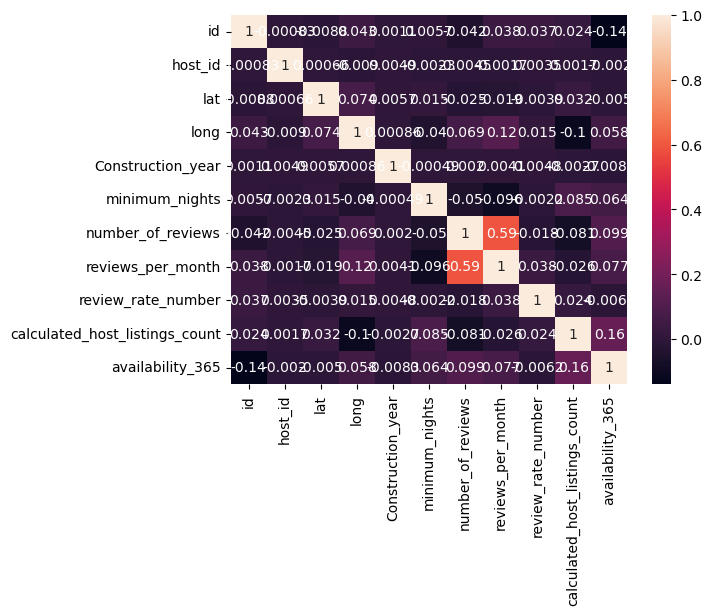

In [12]:
#Plotted a correlation matrix
sns.heatmap(airbnb.corr(), annot=True)

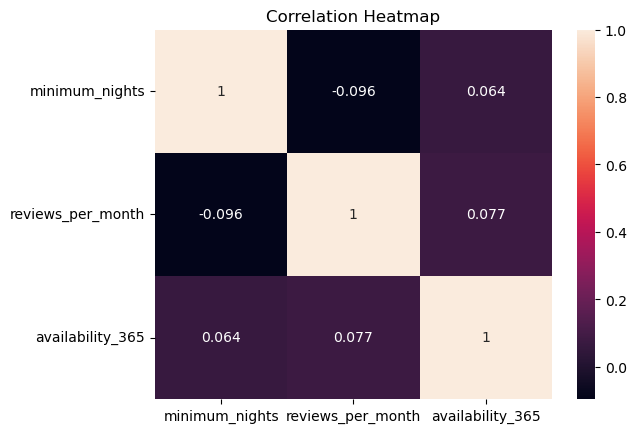

In [13]:

corr = airbnb[['price', 'neighbourhood_group','minimum_nights', 'reviews_per_month', 'availability_365']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

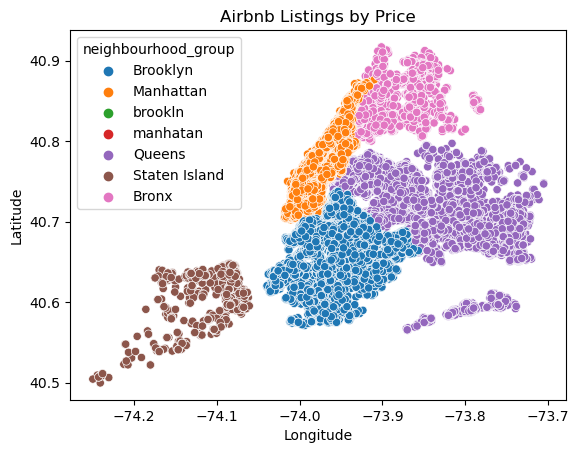

In [14]:
sns.scatterplot(x='long', y='lat', hue='neighbourhood_group', data=airbnb)
plt.title('Airbnb Listings by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Data Preprocessing

In [15]:
#With a few insights started preprocessing the data and clean it!
airbnb.isnull().sum()

id                                     0
NAME                                 250
host_id                                0
host_identity_verified               289
host name                            406
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
Construction_year                    214
price                                247
service_fee                          273
minimum_nights                       409
number_of_reviews                    183
last_review                        15893
reviews_per_month                  15879
review_rate_number                   326
calculated_host_listings_count       319
availability_365                     448
house_rules     

In [16]:
# airbnb.dropna(inplace=True)

# Print the updated dataframe

#Dropped a few variables which can add negligible value to the model and also dropped duplicate values if any
print(airbnb.shape)

airbnb.drop_duplicates(inplace=True)

print(airbnb.shape)

(102599, 26)
(102058, 26)


In [17]:
airbnb = airbnb.drop('house_rules', axis=1)

In [18]:


airbnb = airbnb.drop('license', axis=1)
airbnb.columns
airbnb.shape


(102058, 24)

In [19]:
airbnb.info

<bound method DataFrame.info of               id                                              NAME  \
0        1001254                Clean & quiet apt home by the park   
1        1002102                             Skylit Midtown Castle   
2        1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3        1002755                                               NaN   
4        1003689  Entire Apt: Spacious Studio/Loft by central park   
...          ...                                               ...   
102053  57365208               Cozy bright room near Prospect Park   
102054  57365760         Private Bedroom with Amazing Rooftop View   
102055  57366313     Pretty Brooklyn One-Bedroom for 2 to 4 people   
102056  57366865        Room & private bathroom in historic Harlem   
102057  57367417                                   Rosalee Stewart   

            host_id host_identity_verified host name neighbourhood_group  \
0       80014485718            unconfirmed  Madalin

In [20]:
print(airbnb.shape)
airbnb.isnull().sum()


(102058, 24)


id                                    0
NAME                                250
host_id                               0
host_identity_verified              289
host name                           404
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room_type                             0
Construction_year                   214
price                               247
service_fee                         273
minimum_nights                      400
number_of_reviews                   183
last_review                       15832
reviews_per_month                 15818
review_rate_number                  319
calculated_host_listings_count      319
availability_365                    448
dtype: int64

In [21]:
airbnb.describe()

,id,host_id,lat,long,Construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.020580e+05,1.020580e+05,102050.000000,102050.000000,101844.000000,101658.000000,101875.000000,86240.000000,101739.000000,101739.000000,101610.000000
mean,2.918438e+07,4.926738e+10,40.728097,-73.949652,2012.488090,8.126640,27.517948,1.375408,3.278733,7.936937,141.043992
std,1.627173e+07,2.853742e+10,0.055852,0.049502,5.765838,30.616698,49.571744,1.748019,1.285089,32.266355,135.429156
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.509286e+07,2.459924e+10,40.688730,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.918438e+07,4.912865e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.327590e+07,7.400619e+10,40.762760,-73.932350,2017.000000,5.000000,31.000000,2.010000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [22]:
#Started to drop na values by selecting a group of variables
airbnb = airbnb.dropna(subset=['price','NAME','host_identity_verified'])
airbnb = airbnb.dropna(subset=['lat','long'])

In [23]:
airbnb.shape

(101283, 24)

In [24]:
airbnb=airbnb.dropna(subset=['neighbourhood_group','neighbourhood'])

In [25]:
#Since the dataset is predefined to be for the city of New York in United States, all the NA Values in Country or country code(later on) can be replaced to United States and the code US
import math
def cleaned_state(entry):
    if (isinstance(entry, str)):
        if (entry.upper() == 'United States' or entry.upper == 'United States'):
            return 'United States'
        else:
            return entry
    elif math.isnan(entry):
        return 'United States'
    else:
        return entry
airbnb['country'] = airbnb['country'].apply(cleaned_state)

In [26]:
#To fill null values in a few columns by zero.

airbnb['service_fee'] = airbnb['service_fee'].fillna(0)
airbnb['availability_365'] = airbnb['availability_365'].fillna(0)
airbnb['minimum_nights'] = airbnb['minimum_nights'].fillna(0)

In [27]:
#remove non applicable values ( availbility 365 must be in between 0 and 365; minimum nights cannot be less than 0)


airbnb['availability_365'] = np.where(airbnb['availability_365']<0, airbnb['availability_365']*-1, airbnb['availability_365'])
airbnb['availability_365'] = np.where(airbnb['availability_365']>365, 365, airbnb['availability_365'])
airbnb['minimum_nights'] = np.where(airbnb['minimum_nights']<0, airbnb['minimum_nights']*-1, airbnb['minimum_nights'])

In [28]:
airbnb['availability_365'].describe()

count    101249.000000
mean        139.657853
std         133.459348
min           0.000000
25%           3.000000
50%          95.000000
75%         268.000000
max         365.000000
Name: availability_365, dtype: float64

In [29]:
airbnb['minimum_nights'].describe()

count    101249.000000
mean          8.093660
std          30.219069
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        5645.000000
Name: minimum_nights, dtype: float64

In [30]:
airbnb.neighbourhood_group.value_counts()

Manhattan        43224
Brooklyn         41303
Queens           13110
Bronx             2670
Staten Island      940
brookln              1
manhatan             1
Name: neighbourhood_group, dtype: int64

In [31]:
airbnb[airbnb['neighbourhood_group'] == 'brookln']

,id,NAME,host_id,host_identity_verified,host name,neighbourhood_group,neighbourhood,lat,long,country,...,Construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,2010.0,$580,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0


In [32]:
#A few spelling errors can be corrected: (Verified using the coordinates that these are not false values)
airbnb['neighbourhood_group'] = airbnb['neighbourhood_group'].replace('brookln', 'Brooklyn')

In [33]:
airbnb['neighbourhood_group'] = airbnb['neighbourhood_group'].replace('manhatan', 'Manhattan')

In [34]:
airbnb.isnull().sum().sort_values()

id                                    0
minimum_nights                        0
service_fee                           0
price                                 0
room_type                             0
country                               0
long                                  0
availability_365                      0
neighbourhood                         0
neighbourhood_group                   0
host_identity_verified                0
host_id                               0
NAME                                  0
lat                                   0
cancellation_policy                  64
instant_bookable                     86
country code                        112
number_of_reviews                   182
Construction_year                   186
review_rate_number                  298
calculated_host_listings_count      310
host name                           391
reviews_per_month                 15712
last_review                       15727
dtype: int64

In [35]:
airbnb['last review'] = pd.to_datetime(airbnb['last_review'])

In [36]:
airbnb.drop('last review', axis = 1, inplace=True)

In [37]:
airbnb['country code']

0         US
1         US
4         US
5         US
7         US
          ..
102053    US
102054    US
102055    US
102056    US
102057    US
Name: country code, Length: 101249, dtype: object

In [38]:
def cleaned(entry):
    if (isinstance(entry, str)):
        if (entry.upper() == 'US' or entry.upper == 'US'):
            return 'US'
        else:
            return entry
    elif math.isnan(entry):
        return 'US'
    else:
        return entry
airbnb['country code'] = airbnb['country code'].apply(cleaned)

In [39]:
airbnb = airbnb.dropna(subset=['instant_bookable', 'host name','Construction_year'])

In [40]:
airbnb['number_of_reviews'].describe()

count    100414.000000
mean         27.380156
std          49.375940
min           0.000000
25%           1.000000
50%           7.000000
75%          30.000000
max        1024.000000
Name: number_of_reviews, dtype: float64

In [41]:
#The number of reviews, review rate number do have a lot of null values, and they are filled by taking their median.The median value is often used for this purpose because it is less sensitive to outliers than the mean, which makes it a more robust measure of central tendency
airbnb["number_of_reviews"].fillna(airbnb["number_of_reviews"].median(), inplace=True)

In [42]:
airbnb["review_rate_number"].fillna(airbnb["review_rate_number"].median(), inplace=True)

In [43]:
#the service fee has a $ sign and that string converted to float for better calculations.
airbnb['service_fee'] = airbnb['service_fee'].str.replace('$', '')
airbnb['service_fee'] = airbnb['service_fee'].str.replace(',', '')
airbnb['service_fee'] = airbnb['service_fee'].astype(float)

/var/folders/vr/5rlkpjxd3kj5d7t4tqv3ssvw0000gp/T/ipykernel_27013/1926669660.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb['service_fee'] = airbnb['service_fee'].str.replace('$', '')


In [44]:
airbnb['service_fee'] = airbnb['service_fee'].fillna(0)

# Data Visualizations

In [45]:
#Post a few data cleaning processes, I went ahead to complete a few visualizations to get better idea of the data!

[Text(0.5, 1.0, 'count of minumum nights')]

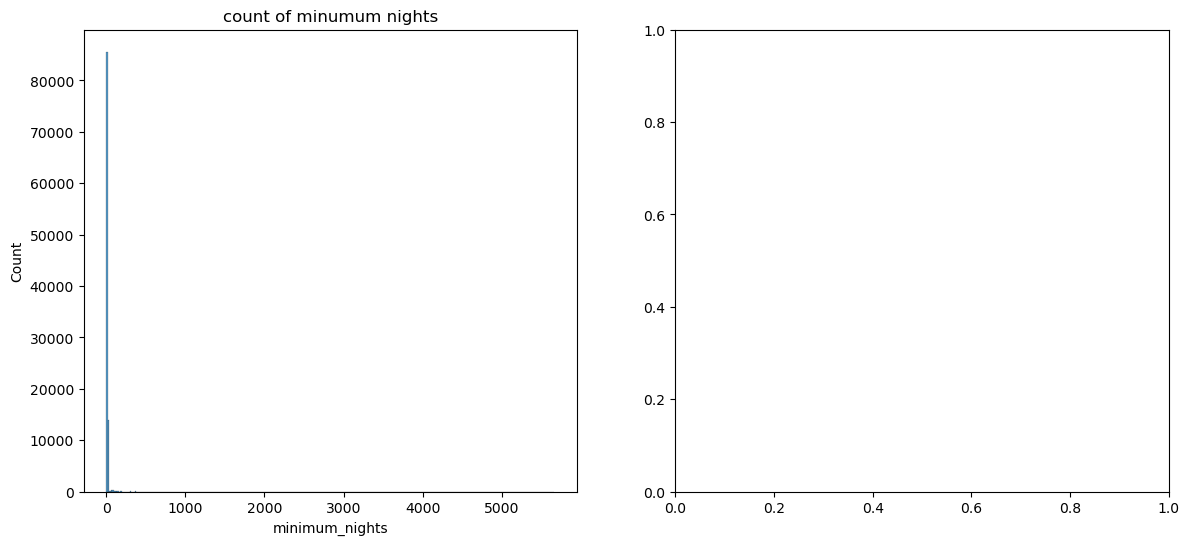

In [46]:
#Plotted Count of the minimum_nights 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
sns.histplot(data = airbnb, x = 'minimum_nights', binwidth = 20, ax=ax1)
ax1.set(title="count of minumum nights")

In [47]:
#Since we are trying to predict price for any airbnb house, we work on the column having price, and that is still not cleaned as it is in the string format and needs to be replaced using Regex to float value.

airbnb['price']

0           $966 
1           $142 
4           $204 
5           $577 
7         $1,060 
           ...   
102037      $531 
102038      $570 
102039      $665 
102040      $982 
102057    $1,128 
Name: price, Length: 100595, dtype: object

In [48]:
airbnb['price'] = airbnb['price'].str.replace('[^\d]+', '', regex=True).astype(int)

In [49]:
airbnb['price']

0          966
1          142
4          204
5          577
7         1060
          ... 
102037     531
102038     570
102039     665
102040     982
102057    1128
Name: price, Length: 100595, dtype: int64

In [50]:
airbnb.price.describe()

count    100595.000000
mean        625.370824
std         331.650295
min          50.000000
25%         340.000000
50%         625.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64

In [51]:
#To observe on the data of price, we can see how varied are the prices, by plotting the count of all values of prices!

<AxesSubplot:xlabel='price', ylabel='Count'>

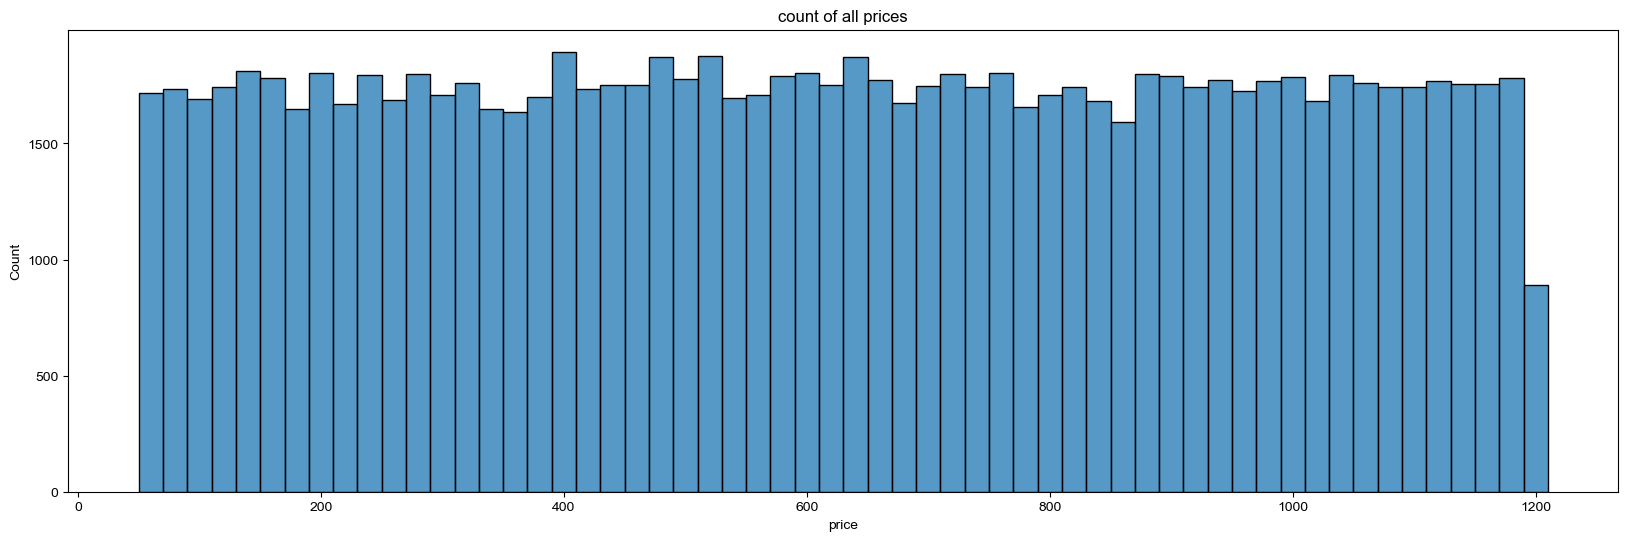

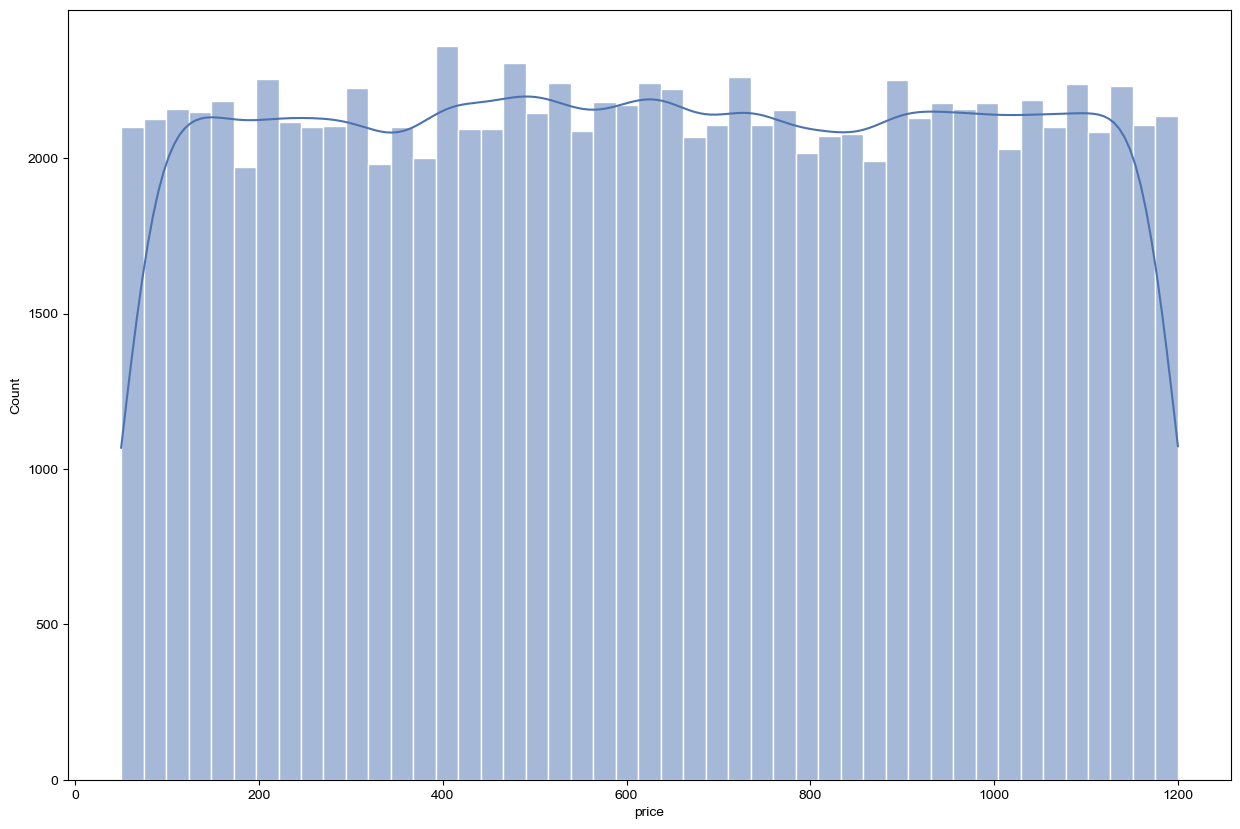

In [52]:
fig, (ax1) = plt.subplots(1, figsize=(20,6))
sns.histplot(data = airbnb, x = 'price', binwidth=20, ax=ax1)
ax1.set(title="count of all prices")
fig, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=2)
sns.histplot(data=airbnb, x="price", kde=True)


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

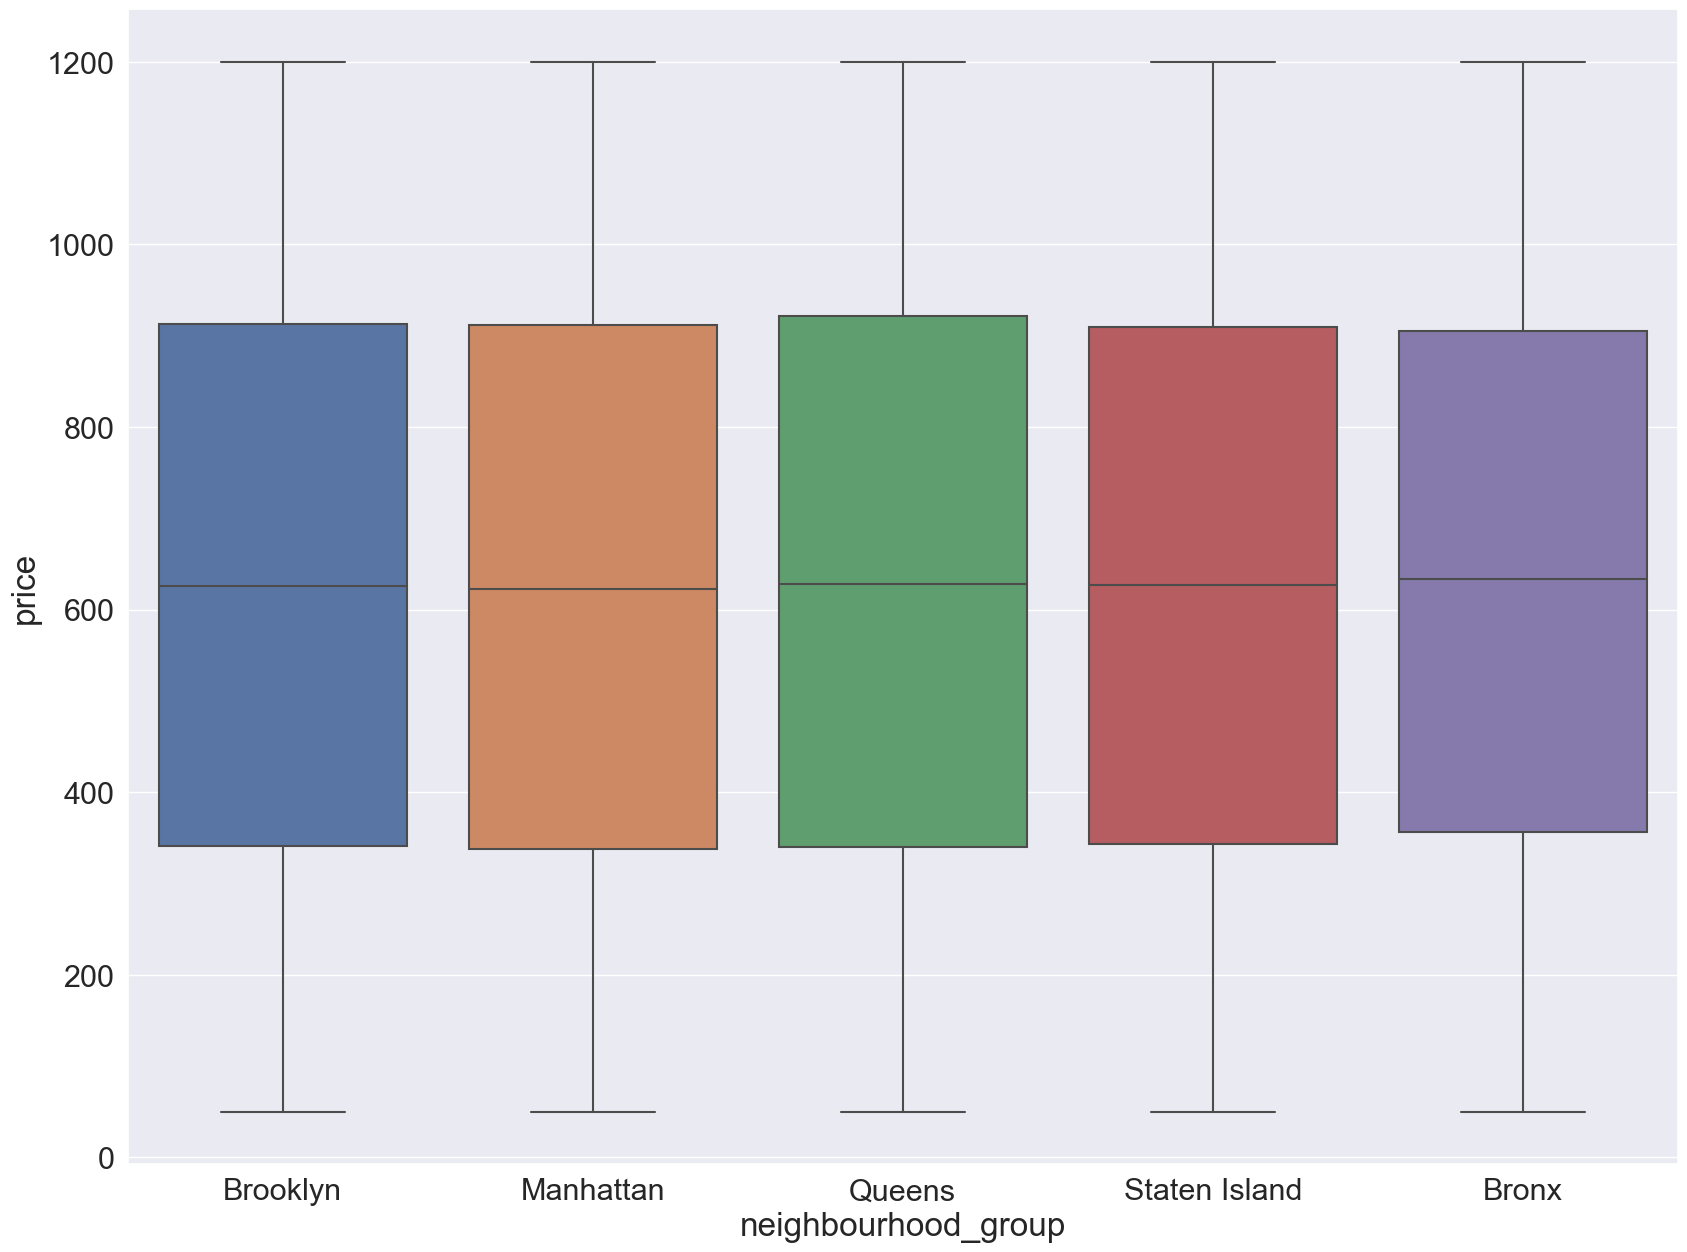

In [53]:
#since we know there are 5 neighbourhood groups,we find their relationship with the price using boxplots.
# No such difference can be seen!
fig, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=2)
sns.boxplot(x="neighbourhood_group", y="price", data=airbnb)

In [54]:
airbnb.neighbourhood_group.describe()

count        100595
unique            5
top       Manhattan
freq          42943
Name: neighbourhood_group, dtype: object

In [55]:
airbnb.room_type.value_counts()

Entire home/apt    52691
Private room       45607
Shared room         2182
Hotel room           115
Name: room_type, dtype: int64

<AxesSubplot:>

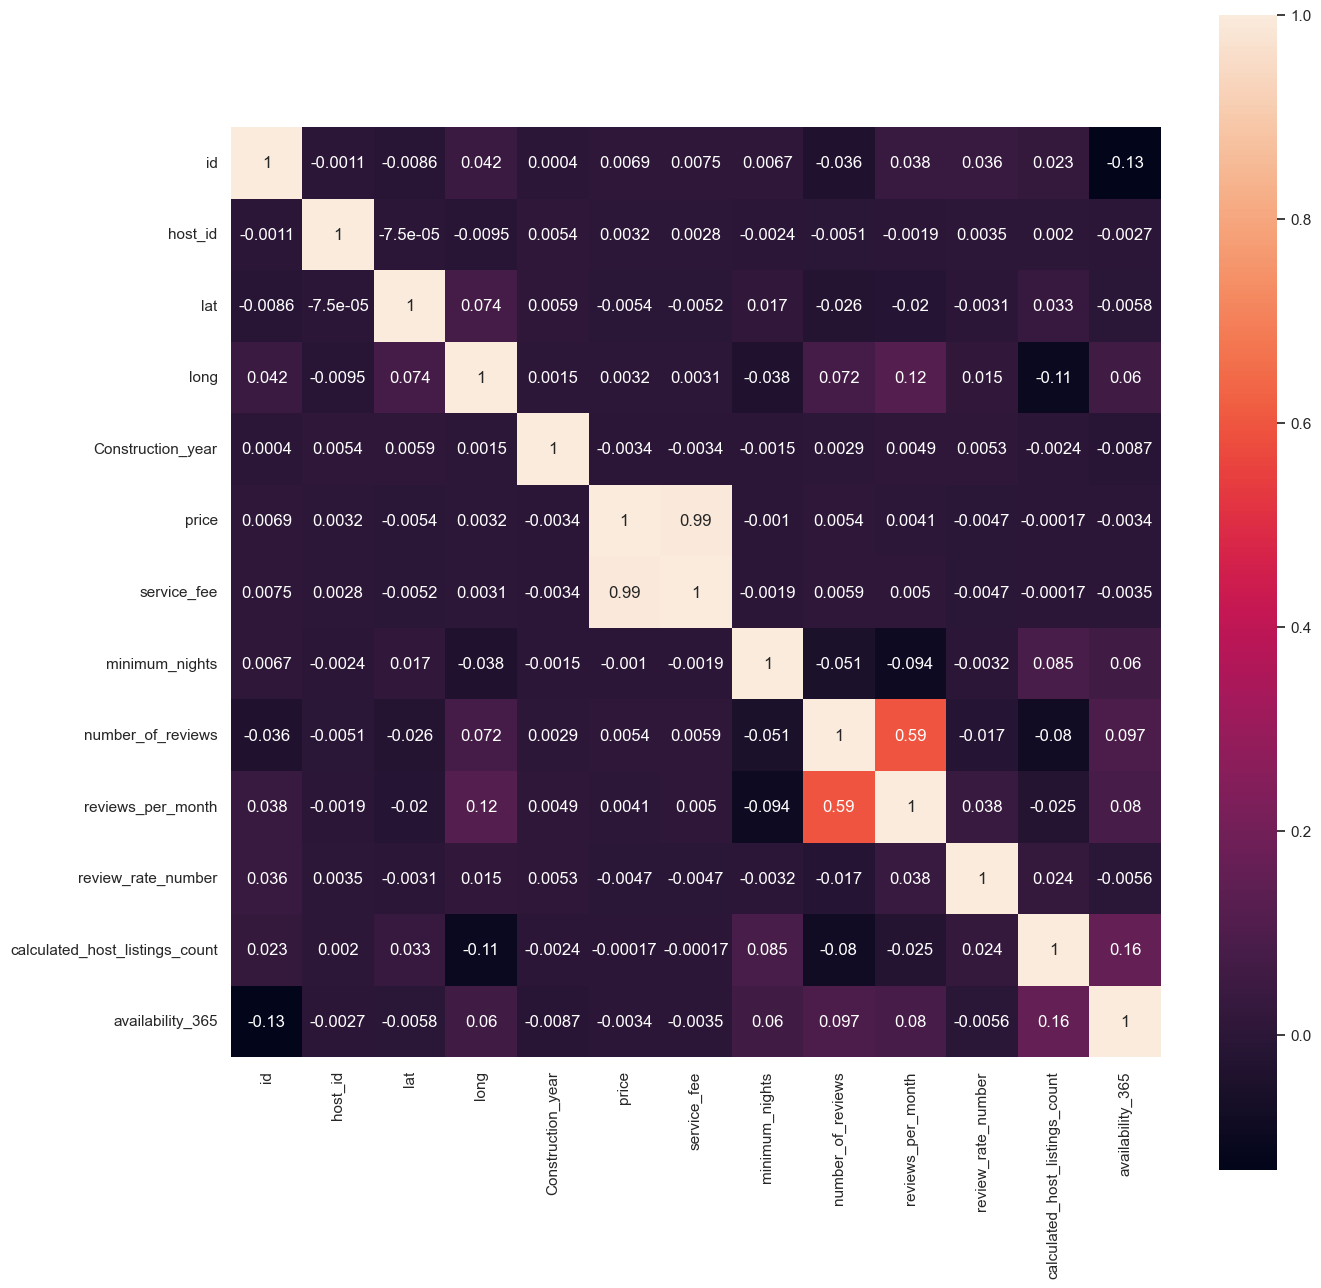

In [56]:
sns.set(rc={"figure.figsize":(15, 15)})
sns.heatmap(airbnb.corr(), annot=True, square=True)

In [57]:
airbnb['number_of_reviews'].describe()


count    100595.000000
mean         27.343486
std          49.339059
min           0.000000
25%           1.000000
50%           7.000000
75%          30.000000
max        1024.000000
Name: number_of_reviews, dtype: float64

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

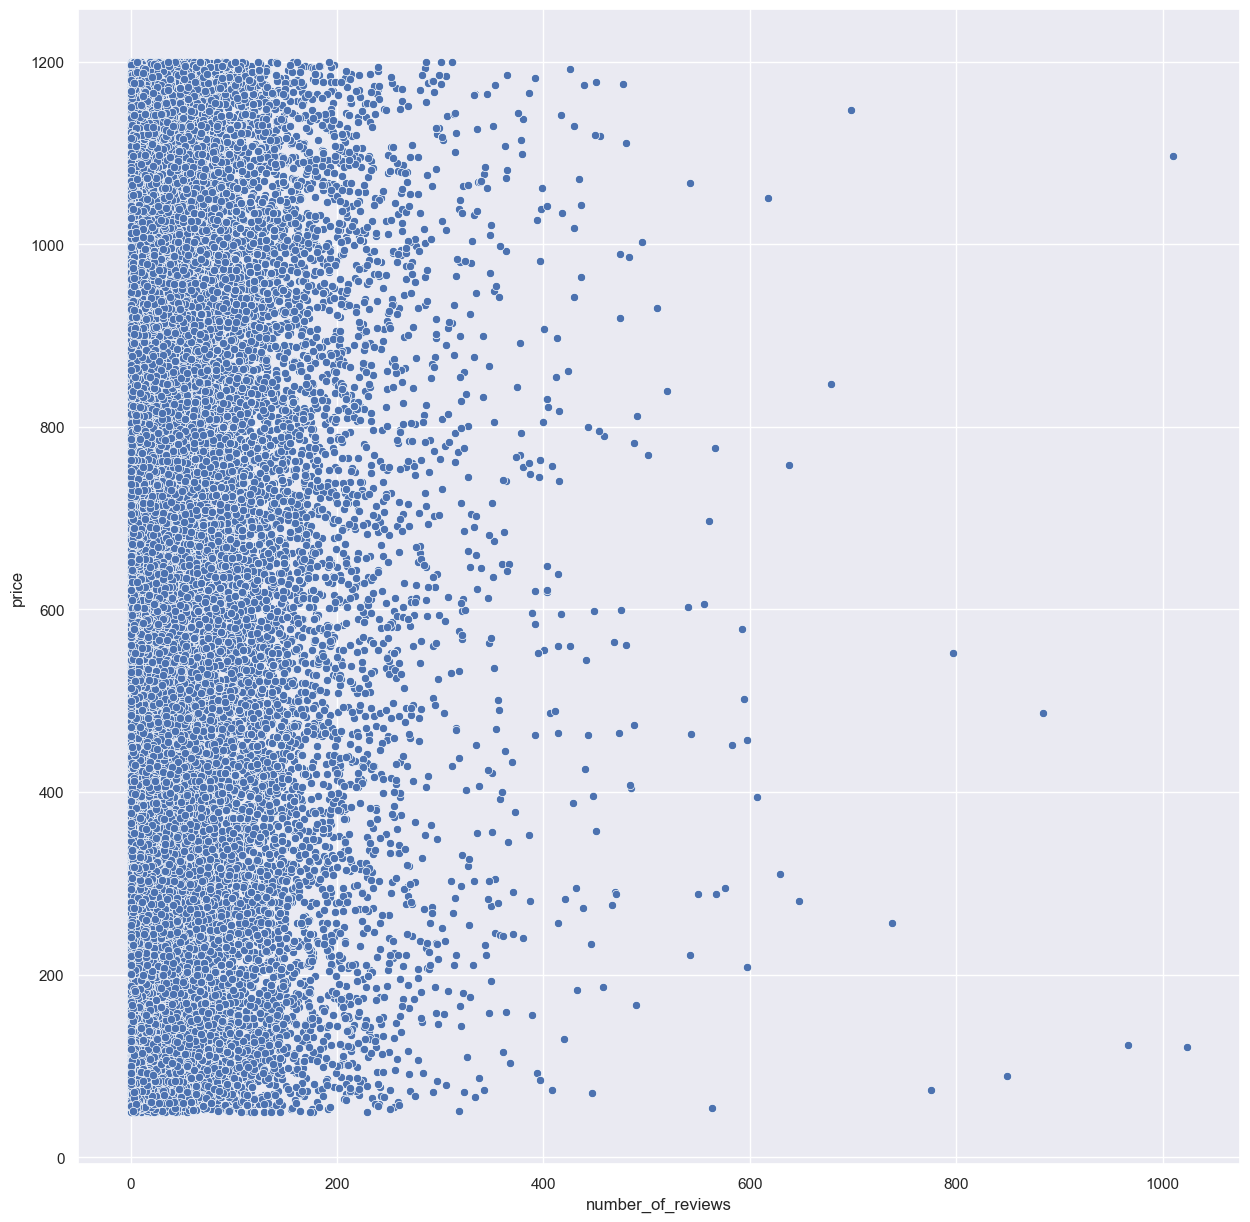

In [58]:
df=airbnb
# plt.scatter(df['number_of_reviews'], df['price'])
# plt.xlabel('Number of Reviews')
# plt.ylabel('Price')
# # plt.show()
# plt.hexbin(df['number_of_reviews'], df['price'], gridsize=20, cmap='viridis')
# plt.xlabel('Number of Reviews')
# plt.ylabel('Price')
# plt.colorbar()
# plt.show()

#Plotted a scatter plot for prices vs the number of reviews and observed that most of the prices range are clustered with less than 200 number of reviews!
sns.scatterplot(x='number_of_reviews', y = 'price', data = airbnb)


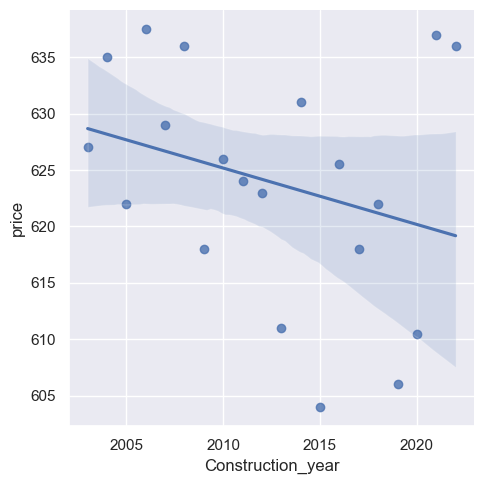

In [59]:
price_per_year = airbnb.groupby('Construction_year')['price'].median().reset_index()

sns.lmplot(x='Construction_year', y='price', data=price_per_year)

##Earlier the construction years were even more correlated

<AxesSubplot:xlabel='room_type', ylabel='price'>

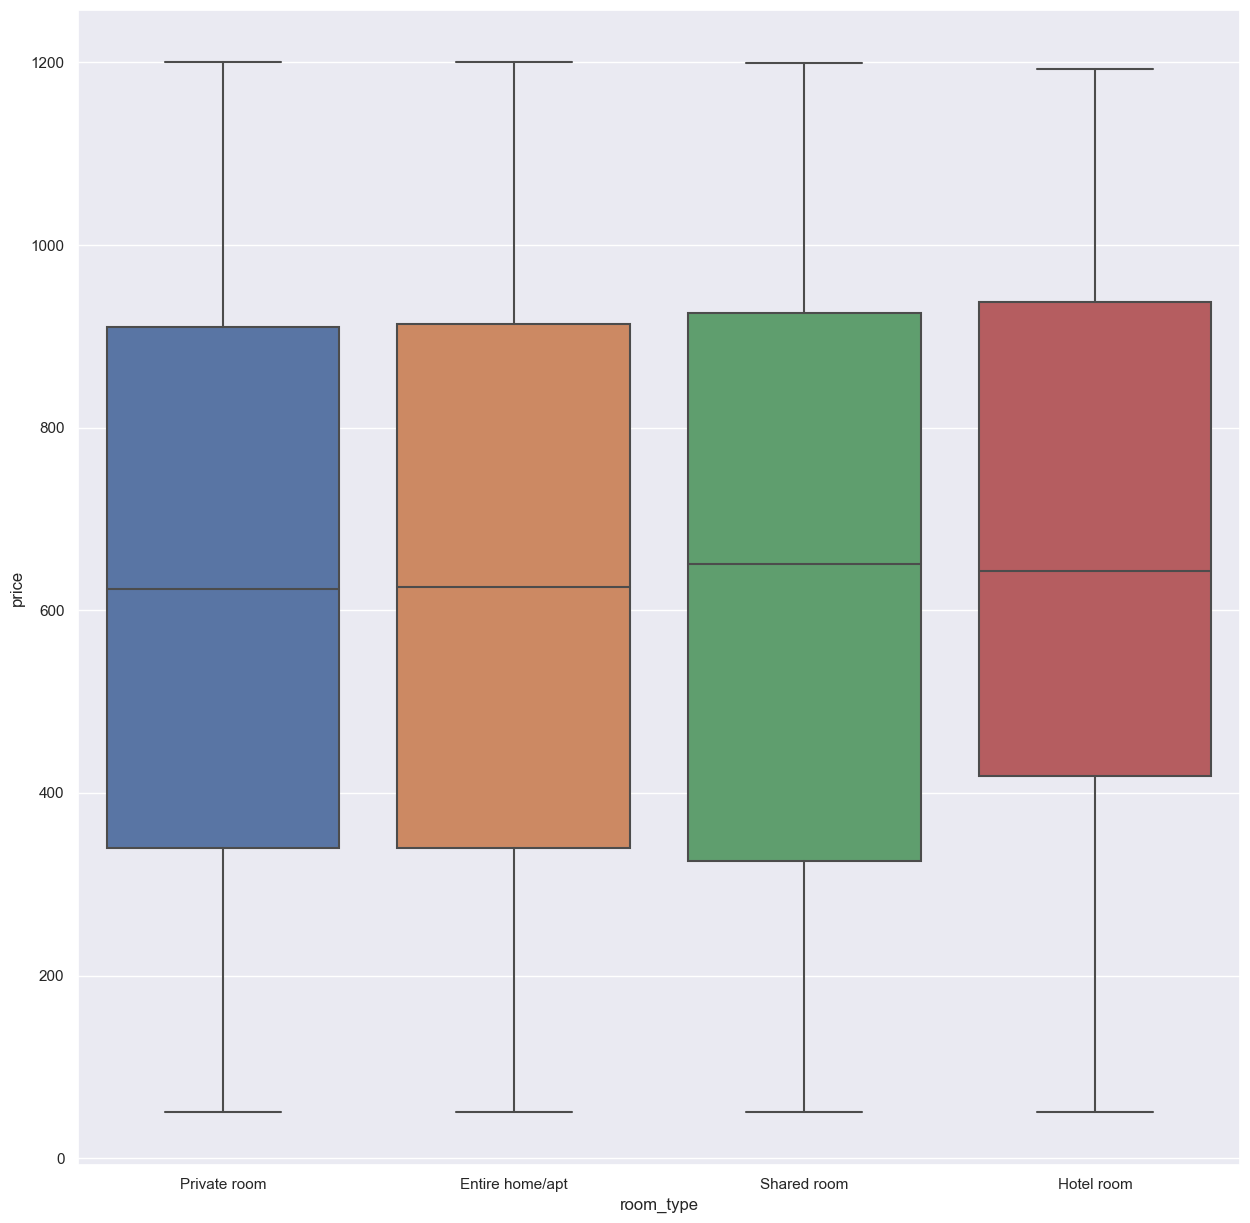

In [60]:
sns.boxplot(x="room_type", y="price", data=airbnb)

In [61]:
#can check price range for top 10 most expensive neighbourhoods as well
airbnb.groupby('neighbourhood')['price'].median().sort_values(ascending=False).head(10).index

Index(['New Dorp', 'Chelsea, Staten Island', 'Woodrow', 'Fort Wadsworth',
       'Jamaica Hills', 'Midland Beach', 'East Morrisania', 'Huguenot',
       'Riverdale', 'Shore Acres'],
      dtype='object', name='neighbourhood')

<AxesSubplot:xlabel='long', ylabel='lat'>

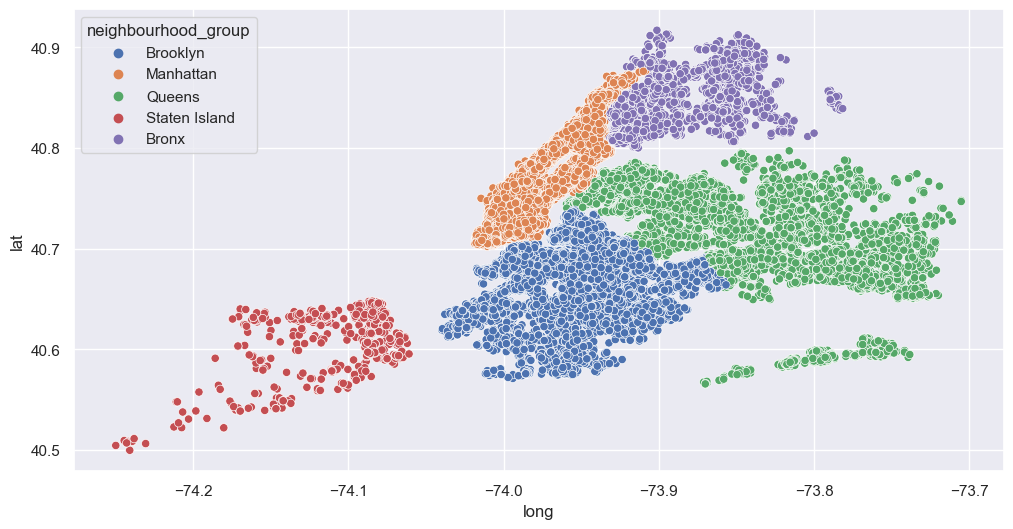

In [62]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='long', y = 'lat', data = airbnb, hue='neighbourhood_group')

/var/folders/vr/5rlkpjxd3kj5d7t4tqv3ssvw0000gp/T/ipykernel_27013/3731179844.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.int(label.get_text()) % 20 == 0:


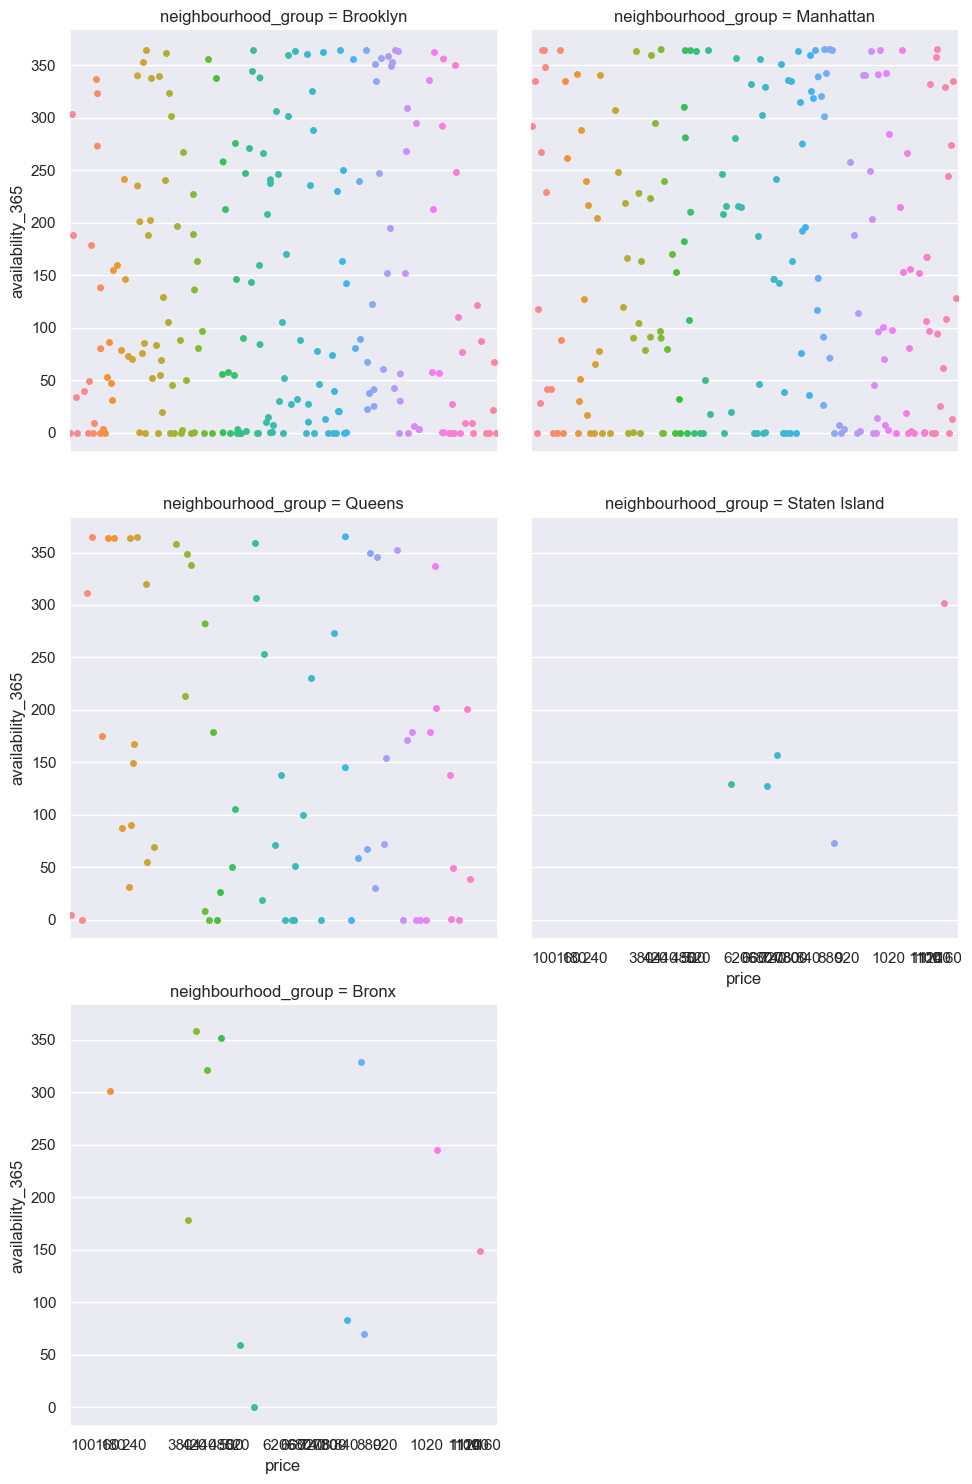

In [63]:
#How is availibility of houses for the year related to price?
plot = sns.catplot(y='availability_365', x = 'price', data = airbnb.sample(500), col='neighbourhood_group', kind='strip', col_wrap = 2)

for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        if np.int(label.get_text()) % 20 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)

<AxesSubplot:xlabel='last_review'>

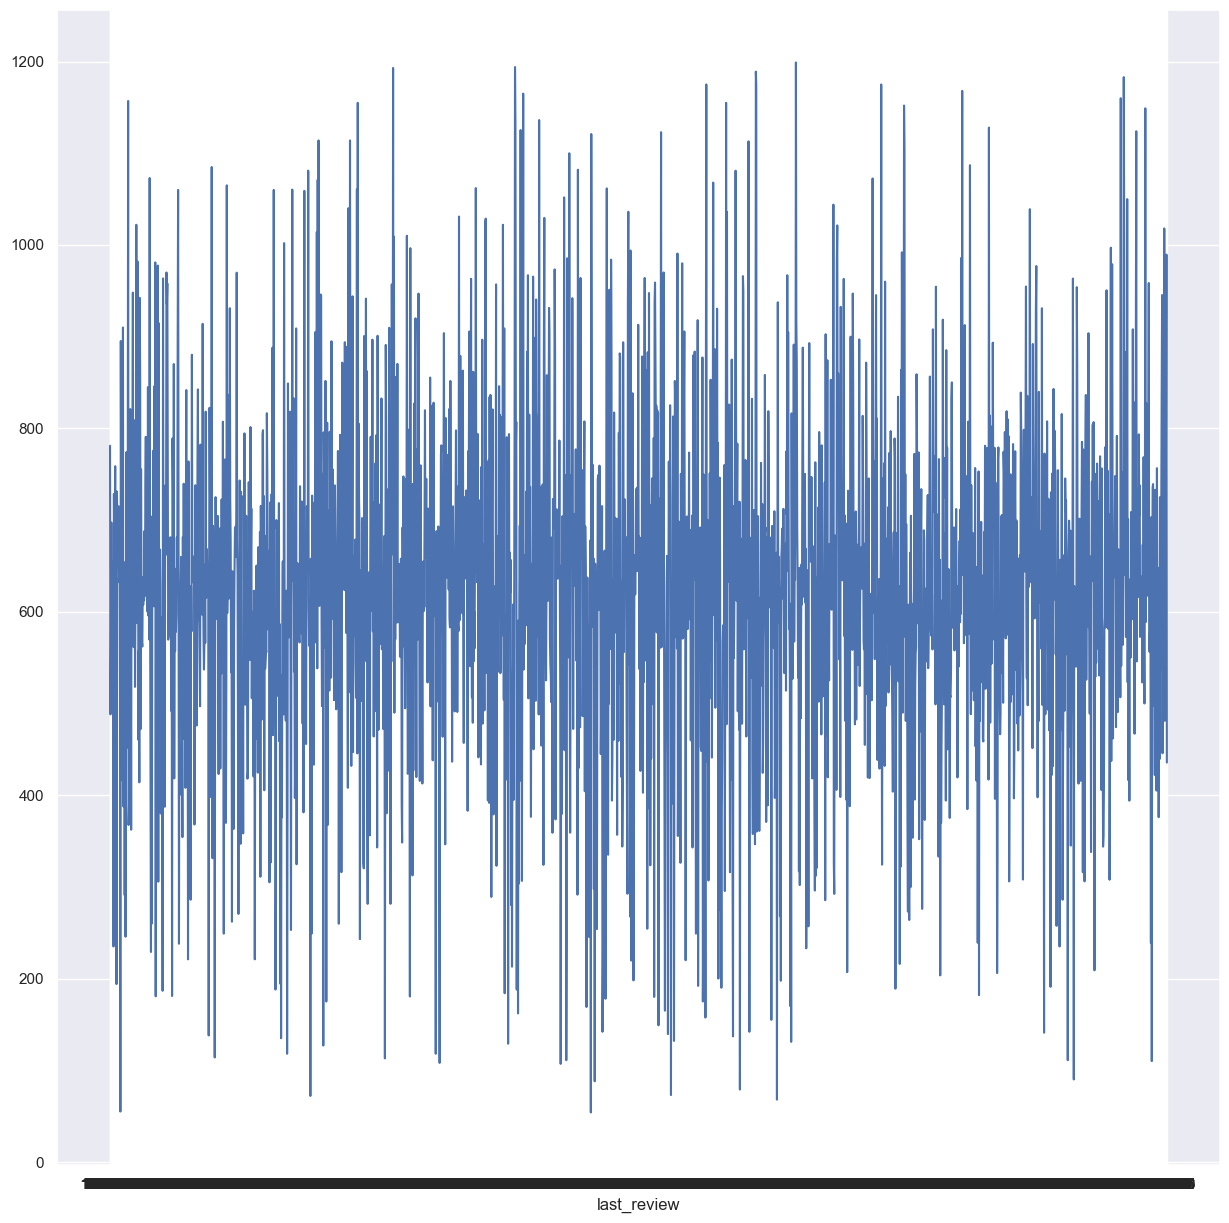

In [64]:
df_grouped = df.groupby("last_review")["price"].mean()
sns.lineplot(x=df_grouped.index, y=df_grouped.values)

# Feature Selection


In [64]:
from sklearn import feature_selection

In [70]:
airbnb.isnull().sum().sort_values()

id                                0
review_rate_number                0
reviews_per_month                 0
number_of_reviews                 0
minimum_nights                    0
service_fee                       0
price                             0
Construction_year                 0
room_type                         0
cancellation_policy               0
calculated_host_listings_count    0
instant_bookable                  0
country                           0
long                              0
lat                               0
neighbourhood                     0
neighbourhood_group               0
host name                         0
host_identity_verified            0
host_id                           0
NAME                              0
country code                      0
availability_365                  0
dtype: int64

In [66]:
def reviews_per_month_cleanup(entry):
    if (math.isnan(entry)):
        return 0
    return entry

airbnb['reviews_per_month'] = airbnb['reviews_per_month'].apply(reviews_per_month_cleanup)

In [67]:
airbnb.calculated_host_listings_count

0         6.0
1         2.0
4         1.0
5         1.0
7         1.0
         ... 
102037    1.0
102038    6.0
102039    3.0
102040    2.0
102057    1.0
Name: calculated_host_listings_count, Length: 100595, dtype: float64

In [68]:
#After the data visualizations, it seems that last review is not very applicable for the problem to be solved.
airbnb=airbnb.drop('last_review',axis=1)

In [69]:
def cleanup(entry):
    if (math.isnan(entry)):
        return 0
    return entry

airbnb['calculated_host_listings_count'] = airbnb['calculated_host_listings_count'].apply(cleanup)

/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_log', ylabel='Density'>

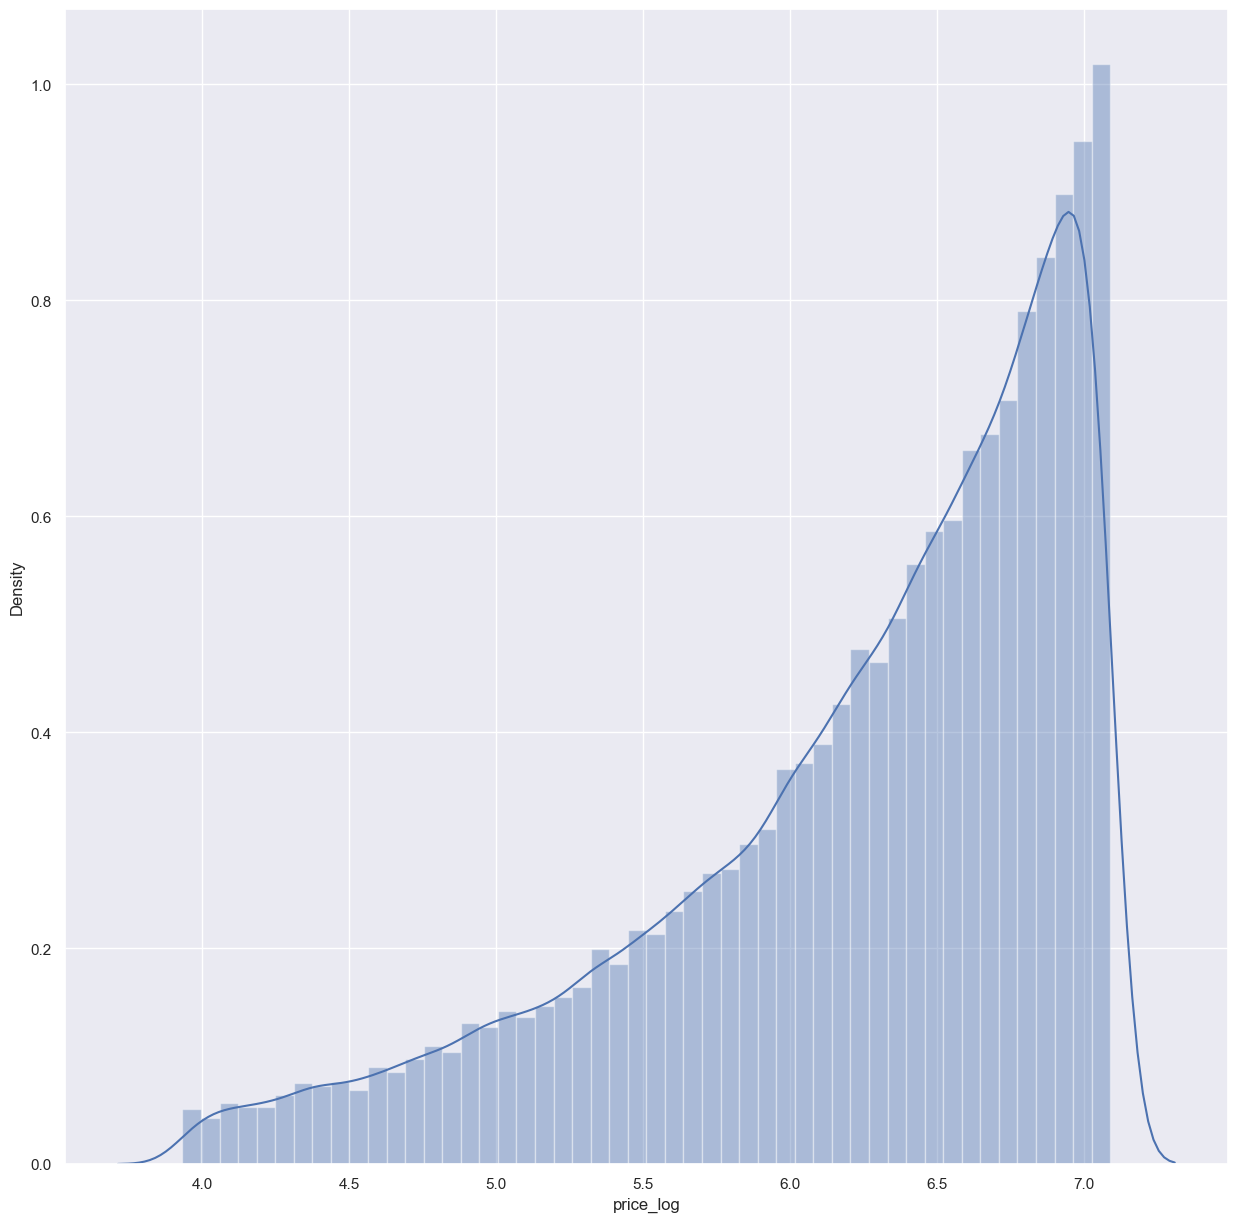

In [71]:
#plotted a log for price values, and could observe there is a skewed representation.
airbnb['price_log'] = np.log(airbnb.price+1)
sns.distplot(airbnb['price_log'])

In [72]:
airbnb['price'].describe()

count    100595.000000
mean        625.370824
std         331.650295
min          50.000000
25%         340.000000
50%         625.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64

In [73]:
airbnb.head()

,id,NAME,host_id,host_identity_verified,host name,neighbourhood_group,neighbourhood,lat,long,country,...,Construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,price_log
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966,193.0,10.0,9.0,0.21,4.0,6.0,286.0,6.874198
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142,28.0,30.0,45.0,0.38,4.0,2.0,228.0,4.962845
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204,41.0,10.0,9.0,0.10,3.0,1.0,289.0,5.323010
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577,115.0,3.0,74.0,0.59,3.0,1.0,365.0,6.359574
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,1060,212.0,45.0,49.0,0.40,5.0,1.0,219.0,6.966967


In [74]:
airbnb.drop(['country','country code'],axis=1 , inplace=True)

In [75]:
#to carry out operations we use a new df
X=airbnb.copy()
# X=airbnb.drop(['name', 'host_name','id','host_id', 'price', 'license'])

In [76]:
X.columns

Index(['id', 'NAME', 'host_id', 'host_identity_verified', 'host name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'Construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365', 'price_log'],
      dtype='object')

In [77]:
X = X[['host_identity_verified','neighbourhood_group','instant_bookable','cancellation_policy','room_type','Construction_year','minimum_nights','number_of_reviews', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365','price', 'service_fee']]

In [78]:
X.service_fee.value_counts()

216.0    518
81.0     509
41.0     507
177.0    507
57.0     505
        ... 
58.0     375
67.0     374
10.0     260
240.0    246
0.0      229
Name: service_fee, Length: 232, dtype: int64

In [79]:

#Since we have a lot of categorical variables, we might need to perform one hot encoding!
#We try to distinguish numerical and categorical variables in to 2 lists.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = X.select_dtypes(include=numerics)
categorical_features = X.select_dtypes(include=['object'])

print('Numerical features: %s' % (numerical_features.columns))
print('Categorical features: %s' % (categorical_features.columns))

Numerical features: Index(['Construction_year', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365', 'price',
       'service_fee'],
      dtype='object')
Categorical features: Index(['host_identity_verified', 'neighbourhood_group', 'instant_bookable',
       'cancellation_policy', 'room_type'],
      dtype='object')


In [80]:
#One hot enoding on the categorical variables


categorical_features_one_hot = pd.get_dummies(categorical_features)
X2 = pd.concat([X.select_dtypes(include=numerics),categorical_features_one_hot], axis=1)


In [81]:
X2.head()

,Construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,price,service_fee,host_identity_verified_unconfirmed,...,neighbourhood_group_Staten Island,instant_bookable_False,instant_bookable_True,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2020.0,10.0,9.0,0.21,4.0,6.0,286.0,966,193.0,1,...,0,1,0,0,0,1,0,0,1,0
1,2007.0,30.0,45.0,0.38,4.0,2.0,228.0,142,28.0,0,...,0,1,0,0,1,0,1,0,0,0
4,2009.0,10.0,9.0,0.10,3.0,1.0,289.0,204,41.0,0,...,0,1,0,0,1,0,1,0,0,0
5,2013.0,3.0,74.0,0.59,3.0,1.0,365.0,577,115.0,0,...,0,0,1,1,0,0,1,0,0,0
7,2009.0,45.0,49.0,0.40,5.0,1.0,219.0,1060,212.0,1,...,0,1,0,0,1,0,0,0,1,0


In [82]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100595 entries, 0 to 102057
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Construction_year                   100595 non-null  float64
 1   minimum_nights                      100595 non-null  float64
 2   number_of_reviews                   100595 non-null  float64
 3   reviews_per_month                   100595 non-null  float64
 4   review_rate_number                  100595 non-null  float64
 5   calculated_host_listings_count      100595 non-null  float64
 6   availability_365                    100595 non-null  float64
 7   price                               100595 non-null  int64  
 8   service_fee                         100595 non-null  float64
 9   host_identity_verified_unconfirmed  100595 non-null  uint8  
 10  host_identity_verified_verified     100595 non-null  uint8  
 11  neighbourhood_group_Bronx 

# Data split

In [83]:
x =X2.drop(["price"],axis=1)
y= X2['price']

In [84]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100595 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Construction_year                   100595 non-null  float64
 1   minimum_nights                      100595 non-null  float64
 2   number_of_reviews                   100595 non-null  float64
 3   reviews_per_month                   100595 non-null  float64
 4   review_rate_number                  100595 non-null  float64
 5   calculated_host_listings_count      100595 non-null  float64
 6   availability_365                    100595 non-null  float64
 7   service_fee                         100595 non-null  float64
 8   host_identity_verified_unconfirmed  100595 non-null  uint8  
 9   host_identity_verified_verified     100595 non-null  uint8  
 10  neighbourhood_group_Bronx           100595 non-null  uint8  
 11  neighbourhood_group_Brookl

In [ ]:
#Split data into train test and val

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [94]:
val_frac=0.1
test_frac=0.1
X_test, X_val, y_test, y_val = train_test_split(x_test, y_test, test_size=val_frac/(val_frac+test_frac), random_state=1)

In [ ]:
#Robust scaling is performed as it is a method of feature scaling that is used to normalize the range of features in a dataset

In [95]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [96]:
X2.isnull().sum().sort_values()

Construction_year                     0
room_type_Hotel room                  0
room_type_Entire home/apt             0
cancellation_policy_strict            0
cancellation_policy_moderate          0
cancellation_policy_flexible          0
instant_bookable_True                 0
instant_bookable_False                0
neighbourhood_group_Staten Island     0
neighbourhood_group_Queens            0
neighbourhood_group_Manhattan         0
room_type_Private room                0
neighbourhood_group_Brooklyn          0
host_identity_verified_verified       0
host_identity_verified_unconfirmed    0
service_fee                           0
price                                 0
availability_365                      0
calculated_host_listings_count        0
review_rate_number                    0
reviews_per_month                     0
number_of_reviews                     0
minimum_nights                        0
neighbourhood_group_Bronx             0
room_type_Shared room                 0


In [97]:
x_train = pd.DataFrame(x_train, columns=x.columns)
y_train = pd.DataFrame(y_train, columns=[y.name])

In [98]:
#also tried p value feature selection, but could not proceed::

# from sklearn import feature_selection
# F_vals, p_vals = feature_selection.f_regression(x_train, y_train)

(24,)
(1,)
Index(['service_fee'], dtype='object')
['service_fee']
1


/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Lasso Regularization:-

alpha: 0.00016


/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


	 training score: 0.9886259616356613
	 validation score: 0.9880314737676295
0.00016
alpha: 0.00018


/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


	 training score: 0.9886259615720026
	 validation score: 0.9880314870278674
0.00018
alpha: 0.0002


/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


	 training score: 0.9886259615011441
	 validation score: 0.9880315001815101
0.0002
alpha: 0.00022


/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


	 training score: 0.9886259614229609
	 validation score: 0.9880315132901919
0.00022
alpha: 0.00024


/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


	 training score: 0.9886259613370705
	 validation score: 0.9880315264649668
0.00024
alpha: 0.00026


/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


	 training score: 0.9886259612436537
	 validation score: 0.9880315396441068
0.00026
alpha: 0.00028


/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


	 training score: 0.9886259611427524
	 validation score: 0.9880315528152717
0.00028
alpha: 0.0003


/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


	 training score: 0.988625961035061
	 validation score: 0.9880315658319739
0.0003
alpha: 0.00032


/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


	 training score: 0.988625960918496
	 validation score: 0.988031579133676
0.00032
best alpha: 0.00032
training set: 0.988625960918496
validation set: 0.988031579133676
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True  True  True  True]
total number of parameters: 22


/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


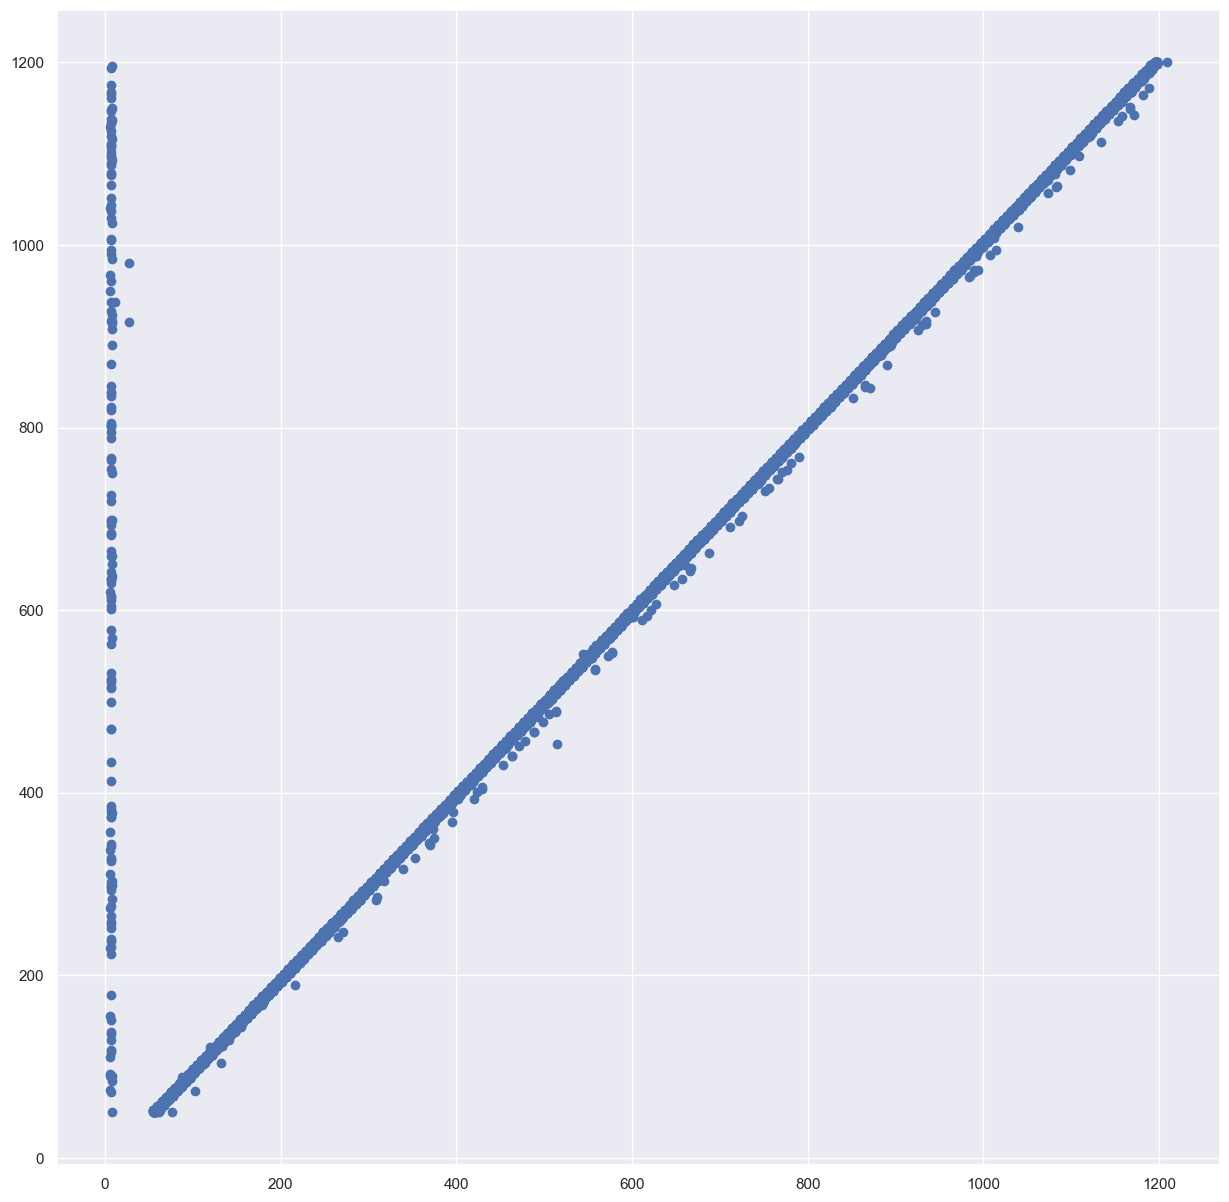

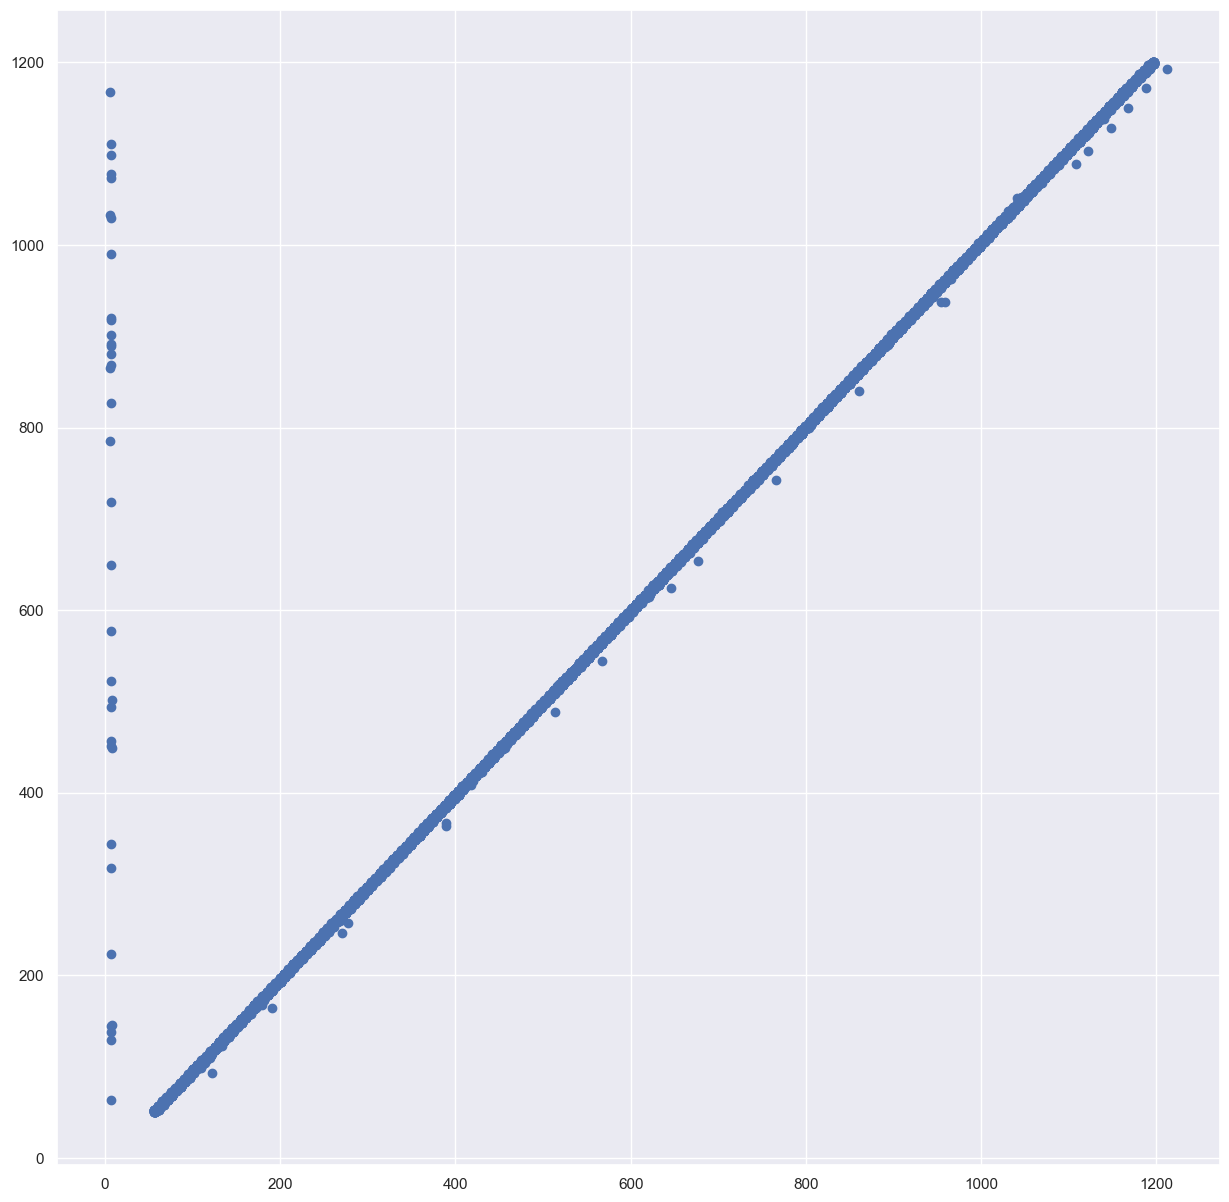

In [192]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
col_set=set()


def check():
    alpha_best=0 #best value of alpha that we will get after trying all values 
    ALPHAS = [0.00016, 0.00018, 0.00020, 0.00022, 0.00024, 0.00026, 0.00028, 0.00030, 0.00032]
    score_best = 0
    for alpha in ALPHAS:
        print('alpha:', alpha)
        reg = Lasso(alpha=alpha, max_iter=1e5)  #run Lasso over all values
        reg.fit(x_train, y_train)  
        score = reg.score(X_val, y_val) 
        print('\t training score:', reg.score(x_train, y_train))
        print('\t validation score:', reg.score(X_val, y_val))
        # after checking the train val scores:
        if score > score_best:
            score_best = score
            alpha_best = alpha
            print(alpha_best)

    print('best alpha:', alpha_best)
    
    #since we got the best value of alpha, lasso is performed with the alpha best value.
    reg = Lasso(alpha=alpha_best, max_iter=1e5)
    reg.fit(x_train, y_train)
    print('training set:', reg.score(x_train, y_train))
    y_pred_train = reg.predict(x_train)
    y_pred_val = reg.predict(X_val)
    print('validation set:', reg.score(X_val, y_val))
    coefs = np.array(reg.coef_!=0)
    print(coefs)
    #Best performing features are printed.
    for i in range(len(coefs)):
        if (coefs[i]):
            col_set.add(x_train.columns[i])
    print('total number of parameters:', sum(reg.coef_!=0))
    
    #two scatter plots are plotted in order to compare the accuracy.
    plt.figure(1)
    plt.scatter(y_pred_train, y_train)
    plt.figure(2)
    plt.scatter(y_pred_val, y_val)
    plt.show()
check()

In [100]:
col_set

{'Construction_year',
 'availability_365',
 'calculated_host_listings_count',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'host_identity_verified_unconfirmed',
 'host_identity_verified_verified',
 'instant_bookable_False',
 'instant_bookable_True',
 'minimum_nights',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'number_of_reviews',
 'review_rate_number',
 'reviews_per_month',
 'room_type_Entire home/apt',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room',
 'service_fee'}

/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


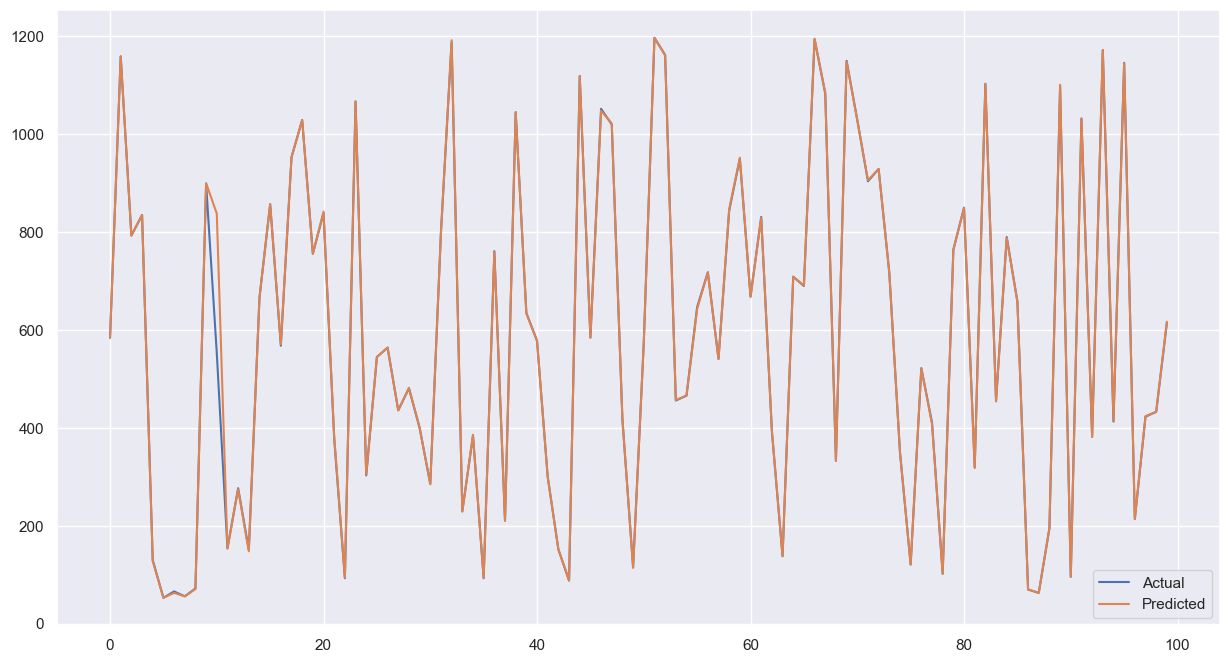

In [138]:
# from sklearn.tree import DecisionTreeRegressor

# xt =X2.drop(["price"],axis=1).values
# yt= X2['price'].values

# xt_train,xt_test,yt_train,yt_test = train_test_split(xt, yt, test_size=0.2, random_state=42)

# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# scaler.fit(x_train)
# xt_train = scaler.transform(xt_train)
# xt_test = scaler.transform(xt_test)

# # Now you can use DecisionTreeRegressor clas
# tdt = DecisionTreeRegressor().fit(xt_train, yt_train)
# tdtv = tdt.score(xt_train,yt_train)
# tdtv
# tdt.score(xt_test,yt_test)
# yt_pred = tdt.predict(x_test)
# plot_predictions(tdt, xt_test,yt_test)
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve

# def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
#     """
#     Plots the learning curve of a model.
#     """
#     train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
    
#     plt.figure(figsize=(8,6))
#     plt.title("Learning Curve")
#     plt.xlabel("Training Examples")
#     plt.ylabel("Score")
#     plt.grid()
#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
#     plt.legend(loc="best")
#     plt.show()
# # plot_learning_curve(tdt,xt,yt)




# Random Forest

In [204]:
xt =X2.drop(["price"],axis=1).values
yt= X2['price'].values

xt_train,xt_test,yt_train,yt_test = train_test_split(xt, yt, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(x_train)
xt_train = scaler.transform(xt_train)
xt_test = scaler.transform(xt_test)


rf = RandomForestRegressor().fit(xt_train, yt_train)
rfv = rf.score(xt_train,yt_train)
rfv

0.9996117008362836

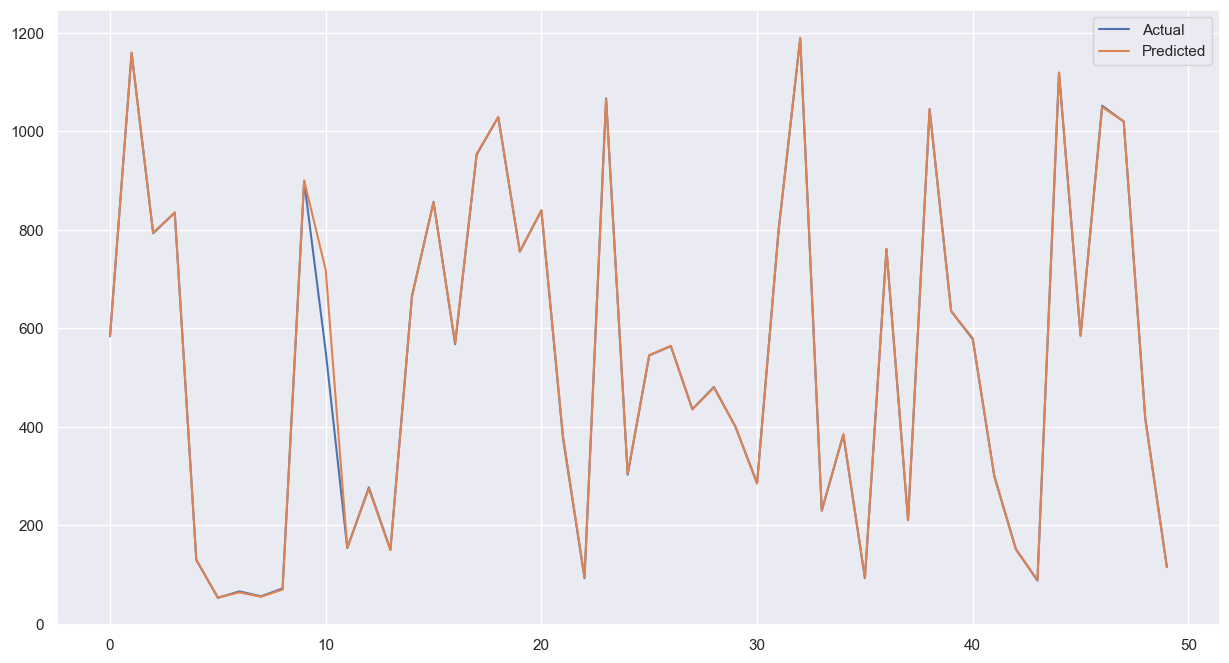

In [206]:

y_predict = rf.predict(xt_test)
df = pd.DataFrame({"Y_test": yt_test , "Y_pred" : y_predict})
plt.figure(figsize=(15,8))
plt.plot(df[:50])
plt.legend(['Actual' , 'Predicted'])

In [207]:
print(rf.score(xt_train , yt_train))
print(rf.score(xt_test , yt_test))

0.9996117008362836
0.9972419150809811


In [211]:
rf_score = r2_score(yt_test , rf.predict(xt_test))
rf_score

mse_1 = mean_squared_error(yt_test, rf.predict(xt_test))
print("MSE on test set:", mse_1)

MSE on test set: 302.33648052691484


In [ ]:
#it seems the mse can still be reduced

# Tinkered and performed Random forest with changes

In [198]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Hyperparamter list:
# Tinkered it with 3 different parameters and tested using the RandomizedSearchCV and the model decides the best combination!
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    
}

model = RandomForestRegressor()

# Performed RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

# Printing the values as result
print("Best hyperparameters:", random_search.best_params_)

# Training the model with the best hyperparameters
best_model = random_search.best_estimator_
best_model.fit(x_train, y_train)

# Evaluate the model on the test set
y_predd = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_predd)
print("MSE on test set:", mse)


/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680:

Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': None}


/var/folders/vr/5rlkpjxd3kj5d7t4tqv3ssvw0000gp/T/ipykernel_27013/2245609381.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(x_train, y_train)
/Users/stlp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


MSE on test set: 280.3644473574863


In [ ]:
#The MSE after the significant changes and changes in the hyperparamters was reduced to 280.

In [ ]:
#Tried using linear regression and validating by predicting values for the first 30 tuples from the DF

In [212]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
regv =reg.score(x_train,y_train)
regv
reg.score(X_test,y_test)
reg.intercept_
reg.coef_[0][:13]

array([ 1.77849263e-01,  4.03286140e-02, -4.84548636e-02, -1.18320685e-01,
       -2.67997918e-01,  3.85374749e-03,  7.64243936e-03,  5.70119041e+02,
        1.63824441e-01, -1.63824441e-01,  2.81002363e-01,  4.11330496e-01,
       -1.74144038e-01])

In [213]:
pd.DataFrame(reg.coef_[0][:13] , X.columns[:-1] , columns=['Coeficient'])

,Coeficient
host_identity_verified,0.177849
neighbourhood_group,0.040329
instant_bookable,-0.048455
cancellation_policy,-0.118321
room_type,-0.267998
Construction_year,0.003854
minimum_nights,0.007642
number_of_reviews,570.119041
reviews_per_month,0.163824
review_rate_number,-0.163824


In [218]:
predict = reg.predict(X_test)
df = pd.DataFrame({"Y_test": y_test.ravel(), "Y_pred" : predict.ravel()})
df.head(30)


,Y_test,Y_pred
0,430,432.687999
1,1154,1152.502520
2,1131,1127.054700
3,952,949.172942
4,104,111.256628
5,996,993.878313
6,260,265.316415
7,64,70.713031
8,168,175.307785
9,1016,1013.683604


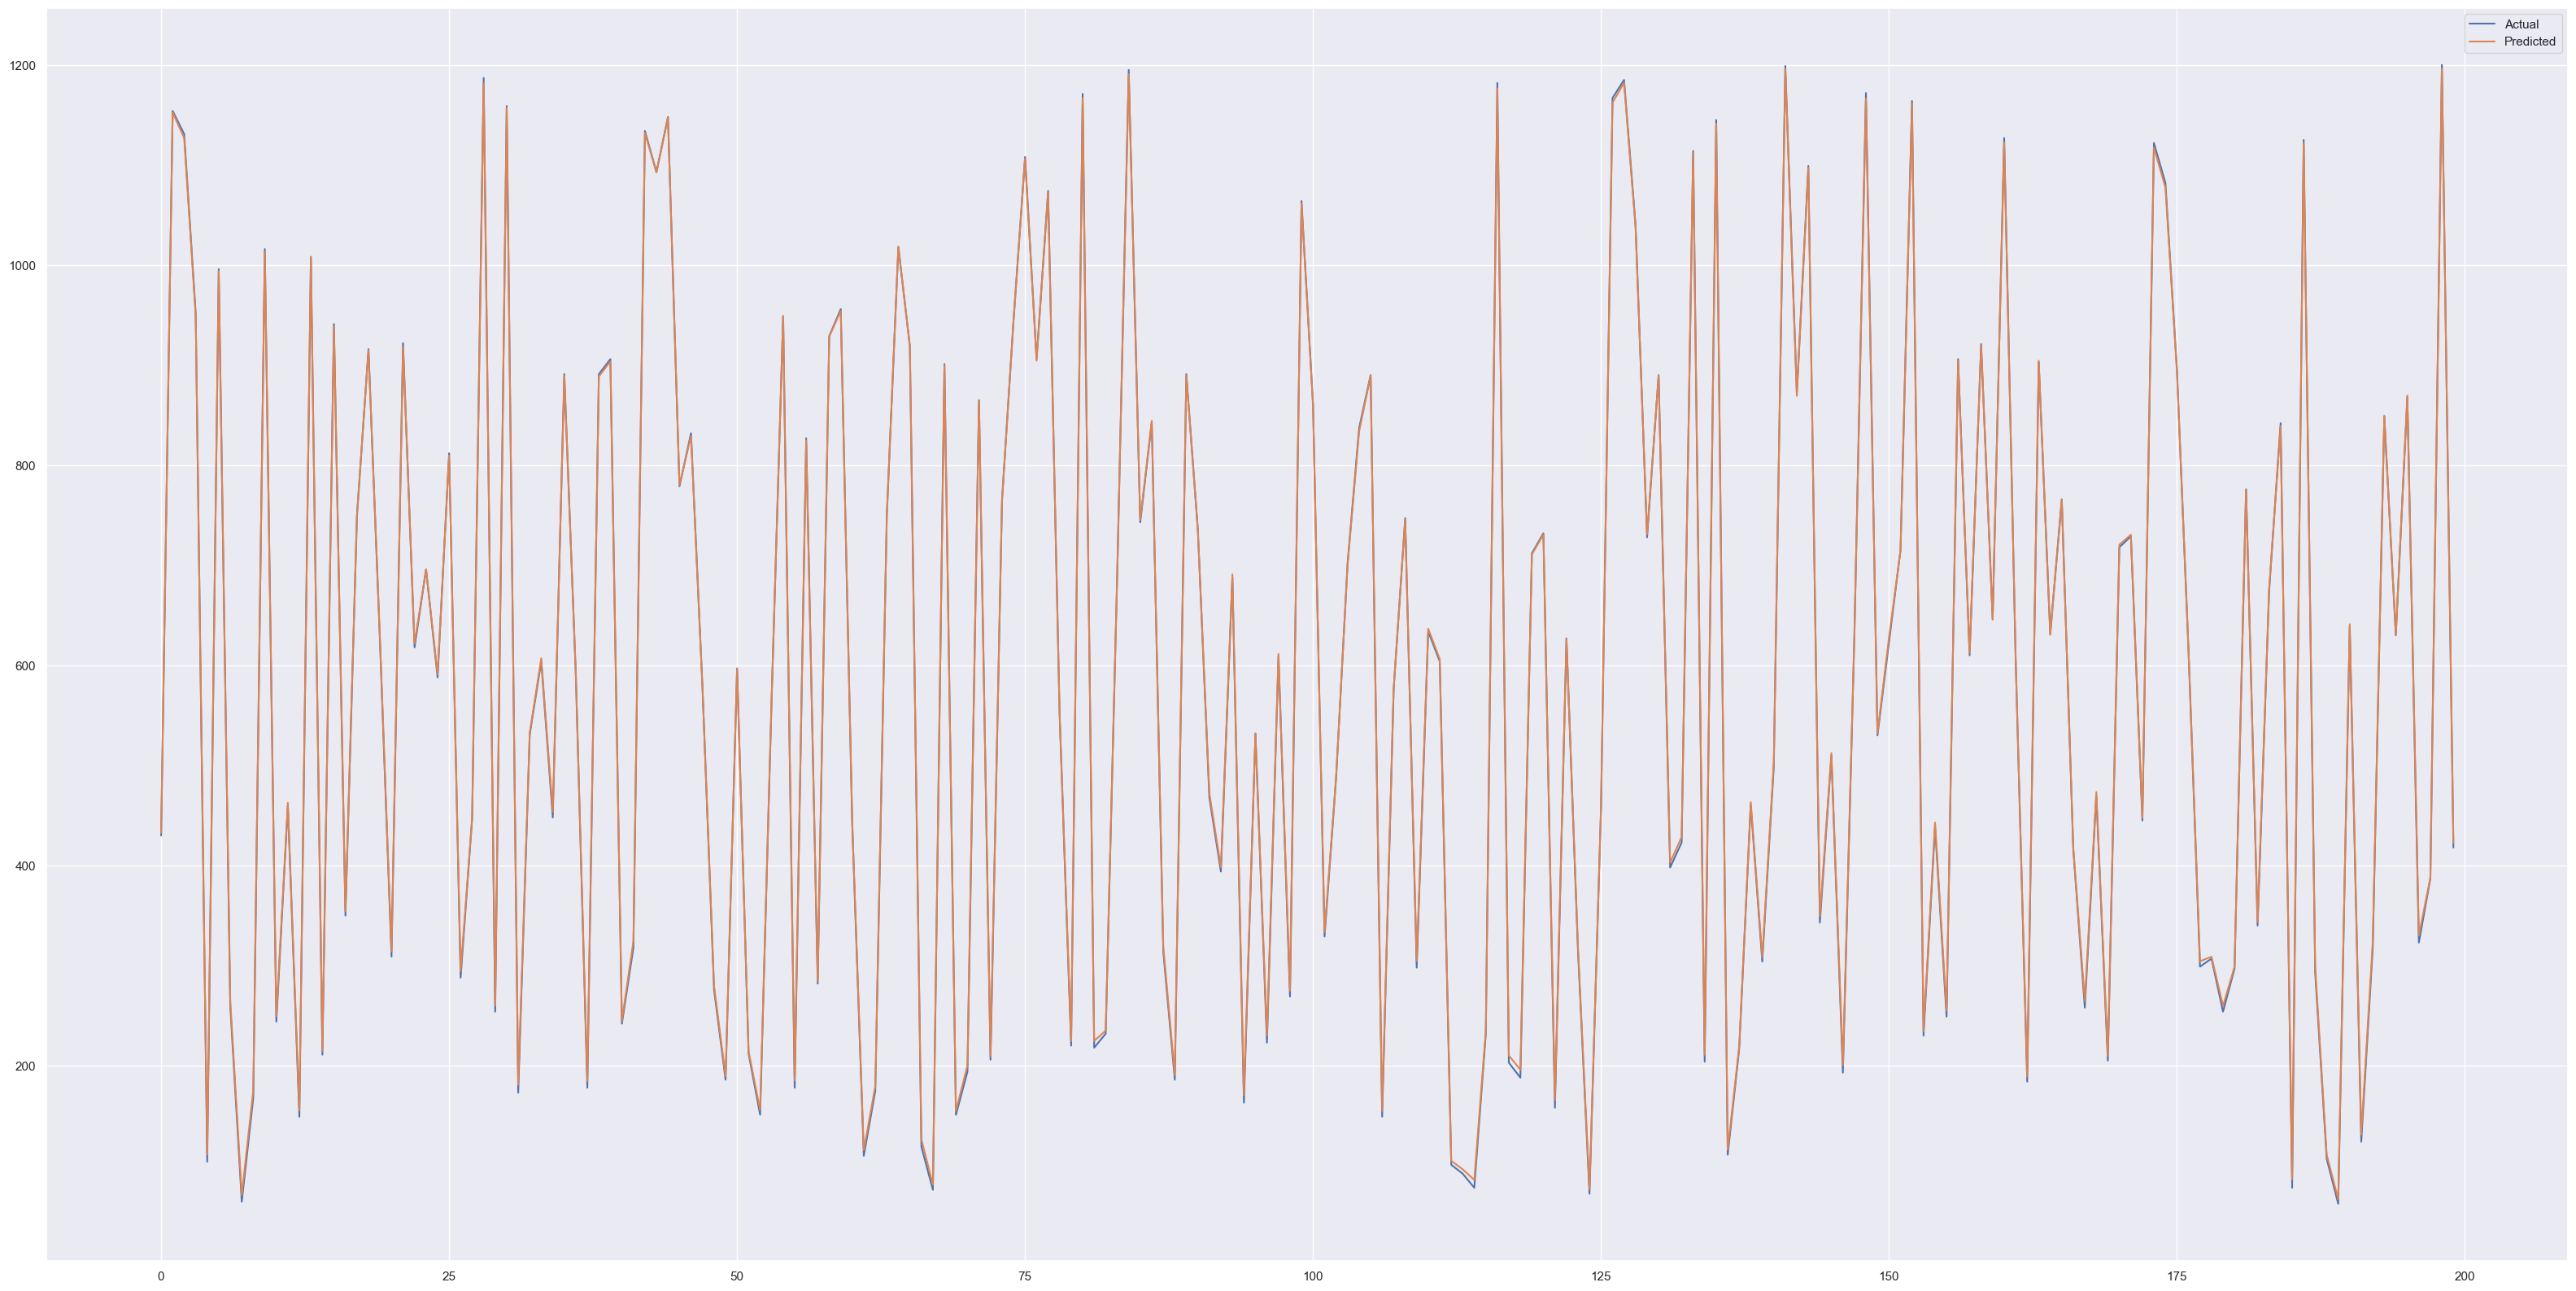

In [215]:
plt.figure(figsize=(40,20))
plt.plot(df[:200])
plt.legend(['Actual' , 'Predicted'])

In [216]:
#

In [217]:
#